In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**DATA PRE-PROCESSING STARTS**

# Extraction of data labels from .xml file to dataframe

In [ ]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [ ]:
annotations = sorted(glob('/content/BCCD_Dataset/BCCD/Annotations/*.xml'))

df = []
cnt = 0
for file in annotations:
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  filename = str(cnt) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('/content/blood_cell_detection.csv', index=False)


In [ ]:
data.head(20)

prev_filename filename cell_type  xmin  xmax  ymin  ymax
0   BloodImage_00000.jpg    0.jpg       WBC   260   491   177   376
1   BloodImage_00000.jpg    0.jpg       RBC    78   184   336   435
2   BloodImage_00000.jpg    0.jpg       RBC    63   169   237   336
3   BloodImage_00000.jpg    0.jpg       RBC   214   320   362   461
4   BloodImage_00000.jpg    0.jpg       RBC   414   506   352   445
5   BloodImage_00000.jpg    0.jpg       RBC   555   640   356   455
6   BloodImage_00000.jpg    0.jpg       RBC   469   567   412   480
7   BloodImage_00000.jpg    0.jpg       RBC     1    87   333   437
8   BloodImage_00000.jpg    0.jpg       RBC     4    95   406   480
9   BloodImage_00000.jpg    0.jpg       RBC   155   247    74   174
10  BloodImage_00000.jpg    0.jpg       RBC    11   104    84   162
11  BloodImage_00000.jpg    0.jpg       RBC   534   639    39   139
12  BloodImage_00000.jpg    0.jpg       RBC   547   640   195   295
13  BloodImage_00000.jpg    0.jpg       RBC   388   481    11   111
14  BloodImage_00000.jpg    0.jpg       RBC   171   264   175   275
15  BloodImage_00000.jpg    0.jpg       RBC   260   374     1    83
16  BloodImage_00000.jpg    0.jpg       RBC   229   343    91   174
17  BloodImage_00000.jpg    0.jpg       RBC    69   184   144   235
18  BloodImage_00000.jpg    0.jpg       RBC   482   594   131   230
19  BloodImage_00000.jpg    0.jpg       RBC   368   464    89   176

## analysing the images

In [ ]:
import cv2
img=cv2.imread("/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg")
print(img.shape)

(480, 640, 3)


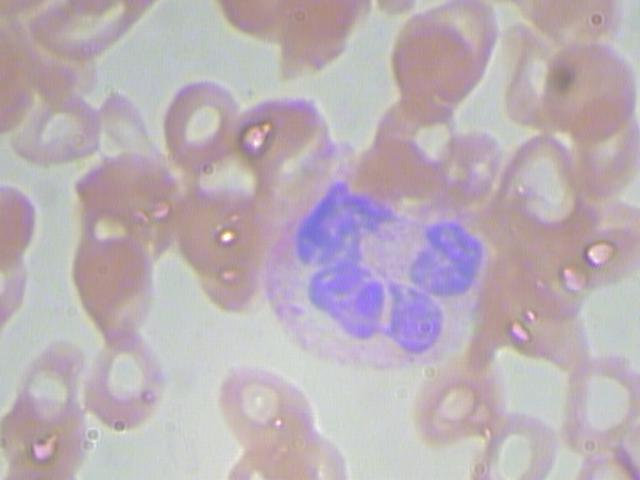

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

## visualise bounding boxes for single image

In [ ]:

	img_path ='/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg'
	xml_path ='/content/BCCD_Dataset/BCCD/Annotations/BloodImage_00000.xml'
	print(img_path)
	img = cv2.imread(img_path)
	if img is None:
		pass
	dom = xml.dom.minidom.parse(xml_path)
	root = dom.documentElement
	objects=dom.getElementsByTagName("object")
	print(objects)
	i=0
	for object in objects:
        
		bndbox = root.getElementsByTagName('bndbox')[i]
		xmin = bndbox.getElementsByTagName('xmin')[0]
		ymin = bndbox.getElementsByTagName('ymin')[0]
		xmax = bndbox.getElementsByTagName('xmax')[0]
		ymax = bndbox.getElementsByTagName('ymax')[0]
		xmin_data=xmin.childNodes[0].data
		ymin_data=ymin.childNodes[0].data
		xmax_data=xmax.childNodes[0].data
		ymax_data=ymax.childNodes[0].data
		print(object)        
		print(xmin_data)
		print(ymin_data)
        
		i= i +1 
		cv2.rectangle(img,(int(xmin_data),int(ymin_data)),(int(xmax_data),int(ymax_data)),(55,255,155),5)

/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg
[<DOM Element: object at 0x7ff6b69baa50>, <DOM Element: object at 0x7ff6b697a410>, <DOM Element: object at 0x7ff6b697aa50>, <DOM Element: object at 0x7ff6b69880f0>, <DOM Element: object at 0x7ff6b6988730>, <DOM Element: object at 0x7ff6b6988d70>, <DOM Element: object at 0x7ff6b698e410>, <DOM Element: object at 0x7ff6b698ea50>, <DOM Element: object at 0x7ff6b69910f0>, <DOM Element: object at 0x7ff6b6991730>, <DOM Element: object at 0x7ff6b6991d70>, <DOM Element: object at 0x7ff6b6996410>, <DOM Element: object at 0x7ff6b6996a50>, <DOM Element: object at 0x7ff6b69990f0>, <DOM Element: object at 0x7ff6b6999730>, <DOM Element: object at 0x7ff6b6999d70>, <DOM Element: object at 0x7ff6b699d410>, <DOM Element: object at 0x7ff6b699da50>, <DOM Element: object at 0x7ff6b69210f0>, <DOM Element: object at 0x7ff6b6921730>]
<DOM Element: object at 0x7ff6b69baa50>
260
177
<DOM Element: object at 0x7ff6b697a410>
78
336
<DOM Element: object at 0

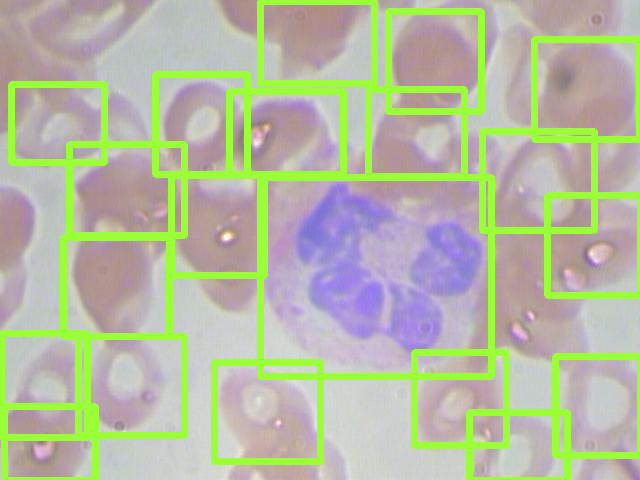

In [ ]:
cv2_imshow(img)

## for all images in folder

In [ ]:
import os
import cv2
import  xml.dom.minidom
 
image_path="/data/images/"
annotation_path="/data/annotations/"
 
files_name = os.listdir(image_path)
for filename_ in files_name:
	filename, extension= os.path.splitext(filename_)
	img_path =image_path+filename+'.jpg'
	xml_path =annotation_path+filename+'.xml'
	print(img_path)
	img = cv2.imread(img_path)
	if img is None:
		pass
	dom = xml.dom.minidom.parse(xml_path)
	root = dom.documentElement
	objects=dom.getElementsByTagName("object")
	print(objects)
	i=0
	for object in objects:
        
		bndbox = root.getElementsByTagName('bndbox')[i]
		xmin = bndbox.getElementsByTagName('xmin')[0]
		ymin = bndbox.getElementsByTagName('ymin')[0]
		xmax = bndbox.getElementsByTagName('xmax')[0]
		ymax = bndbox.getElementsByTagName('ymax')[0]
		xmin_data=xmin.childNodes[0].data
		ymin_data=ymin.childNodes[0].data
		xmax_data=xmax.childNodes[0].data
		ymax_data=ymax.childNodes[0].data
		print(object)        
		print(xmin_data)
		print(ymin_data)
        
		i= i +1 
		cv2.rectangle(img,(int(xmin_data),int(ymin_data)),(int(xmax_data),int(ymax_data)),(55,255,155),5)
	flag=0
	flag=cv2.imwrite("/data/Visualization/{}.jpg".format(filename),img)
	if(flag):
		print(filename,"done")
print("====================================")





# Processing data as per the YOLO_V5 format

**DATAFRAME STRUCTURE**

- filename : contains the name of the image
- cell_type: denotes the type of the cell
- xmin: x-coordinate of the bottom left part of the image
- xmax: x-coordinate of the top right part of the image
- ymin: y-coordinate of the bottom left part of the image
- ymax: y-coordinate of the top right part of the image
- labels : Encoded cell-type **(Yolo - label input-1)**
- width : width of that bbox
- height : height of that bbox
- x_center : bbox center (x-axis)
-	y_center : bbox center (y-axis)
-	x_center_norm	: x_center normalized (0-1) **(Yolo - label input-2)**
-	y_center_norm : y_center normalized (0-1) **(Yolo - label input-3)**
- width_norm : width normalized (0-1) **(Yolo - label input-4)**
-	height_norm : height normalized (0-1) **(Yolo - label input-5)**

In [ ]:
img_width = 640
img_height = 480

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv('/content/blood_cell_detection.csv')

le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['Platelets' 'RBC' 'WBC']


prev_filename filename cell_type  xmin  xmax  ymin  ymax  labels  \
0   BloodImage_00000.jpg    0.jpg       WBC   260   491   177   376       2   
1   BloodImage_00000.jpg    0.jpg       RBC    78   184   336   435       1   
2   BloodImage_00000.jpg    0.jpg       RBC    63   169   237   336       1   
3   BloodImage_00000.jpg    0.jpg       RBC   214   320   362   461       1   
4   BloodImage_00000.jpg    0.jpg       RBC   414   506   352   445       1   
5   BloodImage_00000.jpg    0.jpg       RBC   555   640   356   455       1   
6   BloodImage_00000.jpg    0.jpg       RBC   469   567   412   480       1   
7   BloodImage_00000.jpg    0.jpg       RBC     1    87   333   437       1   
8   BloodImage_00000.jpg    0.jpg       RBC     4    95   406   480       1   
9   BloodImage_00000.jpg    0.jpg       RBC   155   247    74   174       1   
10  BloodImage_00000.jpg    0.jpg       RBC    11   104    84   162       1   
11  BloodImage_00000.jpg    0.jpg       RBC   534   639    39   139       1   
12  BloodImage_00000.jpg    0.jpg       RBC   547   640   195   295       1   
13  BloodImage_00000.jpg    0.jpg       RBC   388   481    11   111       1   
14  BloodImage_00000.jpg    0.jpg       RBC   171   264   175   275       1   
15  BloodImage_00000.jpg    0.jpg       RBC   260   374     1    83       1   
16  BloodImage_00000.jpg    0.jpg       RBC   229   343    91   174       1   
17  BloodImage_00000.jpg    0.jpg       RBC    69   184   144   235       1   
18  BloodImage_00000.jpg    0.jpg       RBC   482   594   131   230       1   
19  BloodImage_00000.jpg    0.jpg       RBC   368   464    89   176       1   
20  BloodImage_00001.jpg    1.jpg       WBC    68   286   315   480       2   
21  BloodImage_00001.jpg    1.jpg       RBC   346   446   361   454       1   
22  BloodImage_00001.jpg    1.jpg       RBC    53   146   179   299       1   
23  BloodImage_00001.jpg    1.jpg       RBC   449   536   400   480       1   
24  BloodImage_00001.jpg    1.jpg       RBC   461   548   132   212       1   
25  BloodImage_00001.jpg    1.jpg       RBC   454   541   295   375       1   
26  BloodImage_00001.jpg    1.jpg       RBC   417   508   283   383       1   
27  BloodImage_00001.jpg    1.jpg       RBC   278   369   342   451       1   
28  BloodImage_00001.jpg    1.jpg       RBC   545   636    62   159       1   
29  BloodImage_00001.jpg    1.jpg       RBC   485   576    91   188       1   

    width  height  x_center  y_center  x_center_norm  width_norm  \
0     231     199       375       276       0.585938    0.360938   
1     106      99       131       385       0.204687    0.165625   
2     106      99       116       286       0.181250    0.165625   
3     106      99       267       411       0.417187    0.165625   
4      92      93       460       398       0.718750    0.143750   
5      85      99       597       405       0.932813    0.132812   
6      98      68       518       446       0.809375    0.153125   
7      86     104        44       385       0.068750    0.134375   
8      91      74        49       443       0.076563    0.142187   
9      92     100       201       124       0.314063    0.143750   
10     93      78        57       123       0.089063    0.145313   
11    105     100       586        89       0.915625    0.164062   
12     93     100       593       245       0.926562    0.145313   
13     93     100       434        61       0.678125    0.145313   
14     93     100       217       225       0.339062    0.145313   
15    114      82       317        42       0.495312    0.178125   
16    114      83       286       132       0.446875    0.178125   
17    115      91       126       189       0.196875    0.179688   
18    112      99       538       180       0.840625    0.175000   
19     96      87       416       132       0.650000    0.150000   
20    218     165       177       397       0.276562    0.340625   
21    100      93       396       407       0.618750    0.156250 

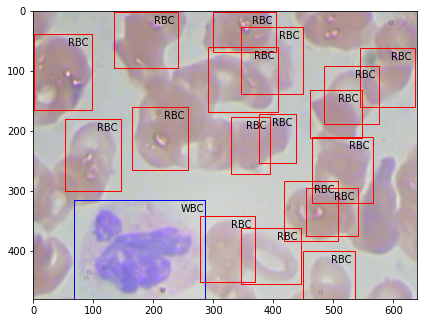

In [ ]:
#@title SAMPLE PLOT - shape (480, 640, 3)
fig = plt.figure()
import cv2
#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00001.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.filename == "1.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

# Splitting into training and validation datasets

In [ ]:
df_train, df_valid = model_selection.train_test_split(df, test_size=0.1, random_state=13, shuffle=True)
print(df_train.shape, df_valid.shape)

(4399, 16) (489, 16)


In [ ]:
os.mkdir('/content/bcc/')
os.mkdir('/content/bcc/images/')
os.mkdir('/content/bcc/images/train/')
os.mkdir('/content/bcc/images/valid/')

os.mkdir('/content/bcc/labels/')
os.mkdir('/content/bcc/labels/train/')
os.mkdir('/content/bcc/labels/valid/')

# Data segregation and moving to it's corresponding folders
- BCC
  - Images
    - Train (364 images [.jpg files])
    - Valid (270 images [.jpg files])
  - Labels
    - Train (364 labels [.txt files])
    - Valid (270 labels [.txt files])


**STRUCTURE OF .txt FILE**

- One row per object
- Each row is class x_center y_center width height format.
- Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes  are in pixels, divide x_center and width by image width, and y_center and height by image height.
- Class numbers are zero-indexed (start from 0).


In [ ]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

In [ ]:
%%time
src_img_path = "/content/BCCD_Dataset/BCCD/JPEGImages/"
src_label_path = "/content/BCCD_Dataset/BCCD/Annotations/"

train_img_path = "/content/bcc/images/train"
train_label_path = "/content/bcc/labels/train"

valid_img_path = "/content/bcc/images/valid"
valid_label_path = "/content/bcc/labels/valid"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

CPU times: user 1.52 s, sys: 177 ms, total: 1.69 s
Wall time: 1.75 s


In [ ]:
try:
  shutil.rmtree('/content/bcc/images/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/images/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

print("No. of Training images", len(os.listdir('/content/bcc/images/train')))
print("No. of Training labels", len(os.listdir('/content/bcc/labels/train')))

print("No. of valid images", len(os.listdir('/content/bcc/images/valid')))
print("No. of valid labels", len(os.listdir('/content/bcc/labels/valid')))

No. of Training images 364
No. of Training labels 364
No. of valid images 270
No. of valid labels 270


# **END OF DATA PRE-PROCESSING**

#**YOLO V5 STARTS**

In [ ]:
!mkdir -p '/content//YOLO/'
!cp -r '/content/bcc' '/content/YOLO/'

# Cloning from the yolo v5 repo.
More can be found at here : [yolo](https://github.com/ultralytics/yolov5)

In [ ]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 14112, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 14112 (delta 221), reused 219 (delta 143), pack-reused 13783
Receiving objects: 100% (14112/14112), 13.62 MiB | 30.46 MiB/s, done.
Resolving deltas: 100% (9663/9663), done.


In [ ]:
!pip install -qr '/content/yolov5/requirements.txt'  # install dependencies

     |████████████████████████████████| 182 kB 5.1 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 59.7 MB/s 


In [ ]:
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

# WE SHOULD CREATE A .yaml FILE AND THEN PLACE IT INSIDE THE yolov5 FOLDER

#**Contents of YAML file**

train: /content/bcc/images/train                    
val: /content/bcc/images/valid

nc: 3

names: ['Platelets', 'RBC', 'WBC']


<img src="https://github.com/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count_and_Detection/blob/master/imgs/bcc_yaml.PNG?raw=true" width="50%">



In [ ]:
!echo -e 'train: /content/bcc/images/train\nval: /content/bcc/images/valid\n\nnc: 3\nnames: ['Platelets', 'RBC', 'WBC']' >> bcc.yaml
!cat 'bcc.yaml'

train: /content/bcc/images/train
val: /content/bcc/images/valid

nc: 3
names: [Platelets, RBC, WBC]


In [ ]:
shutil.copyfile('/content/bcc.yaml', '/content/yolov5/bcc.yaml')

'/content/yolov5/bcc.yaml'

#**Also edit the number of classes (nc) in the ./models/*.yaml file**

Choose the yolo model of your choice


In [ ]:
!sed -i 's/nc: 80/nc: 3/g' ./yolov5/models/yolov5s.yaml

<img src="https://cdn-images-1.medium.com/max/600/1*hCE5VwKkqHlZW466umYTTA.png">

# Training command

**Training Parameters**

!python 
- <'location of train.py file'> 
- --img <'width of image'>
- --batch <'batch size'>
- --epochs <'no of epochs'>
- --data <'location of the .yaml file'>
- --cfg <'Which yolo configuration you want'>(yolov5s/yolov5m/yolov5l/yolov5x).yaml | (small, medium, large, xlarge)
- --name <'Name of the best model after training'>

**METRICS FROM TRAINING PROCESS**

**No.of classes, No.of images, No.of targets, Precision (P), Recall (R), mean Average Precision (map)**
- Class | Images | Targets | P | R | mAP@.5 | mAP@.5:.95: |
- all   | 270    |     489 |    0.0899 |       0.827 |      0.0879 |      0.0551

In [ ]:
%%time

!python '/content/yolov5/train.py' --img 640 --batch 8 --epochs 15 --data '/content/yolov5/bcc.yaml' --cfg '/content/yolov5/models/yolov5s.yaml' --name BCCM

train: weights=yolov5/yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/yolov5/bcc.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=BCCM, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

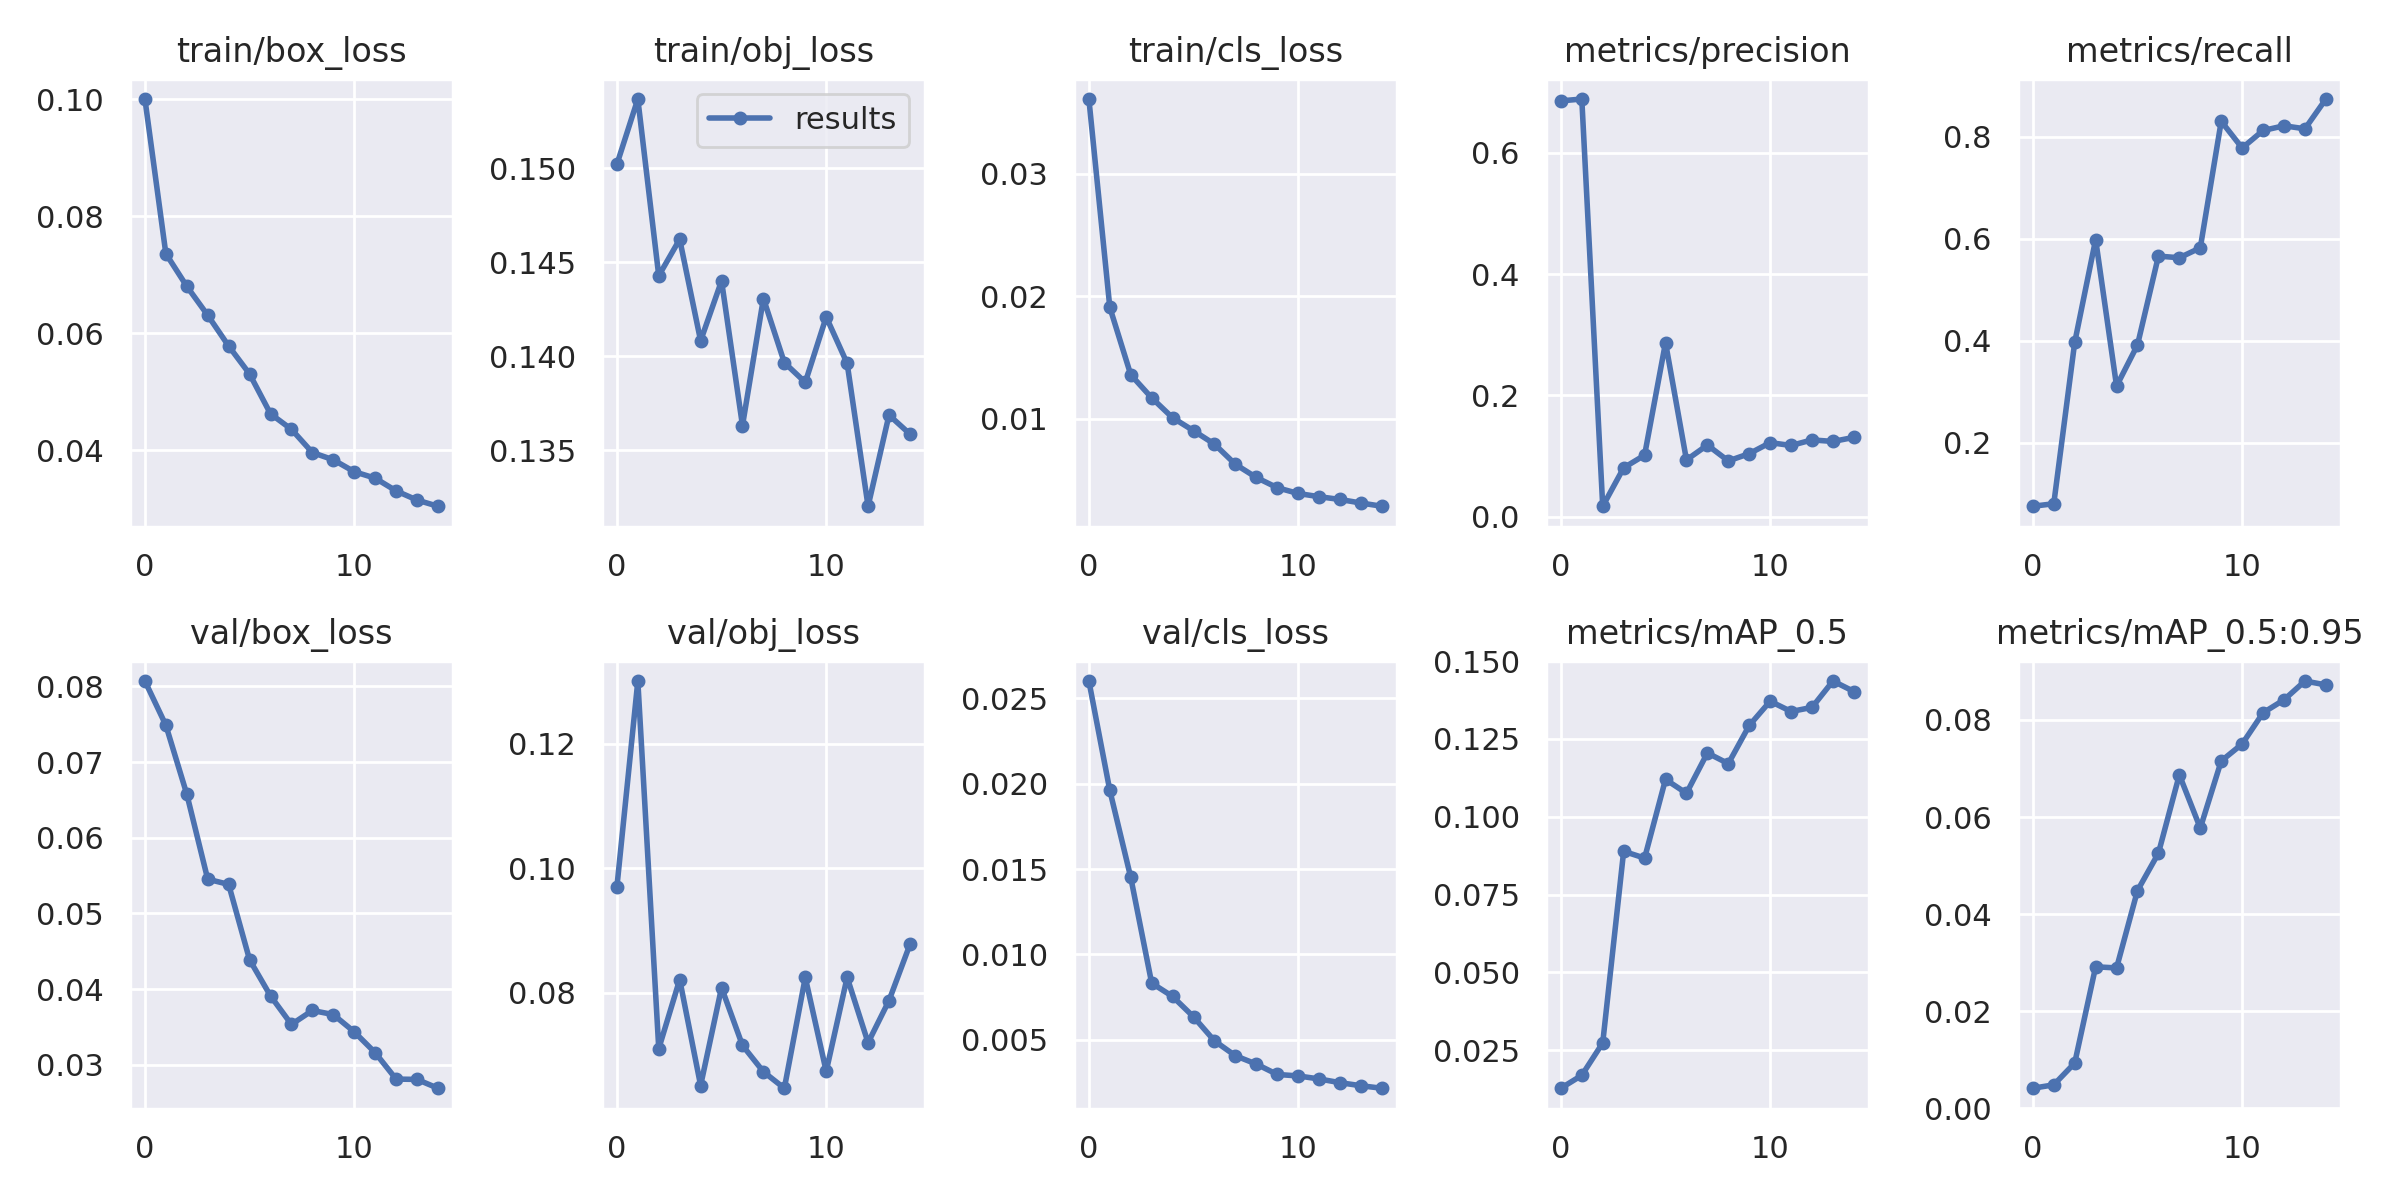

In [ ]:
import cv2
img=cv2.imread("/content/yolov5/runs/train/BCCM/results.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

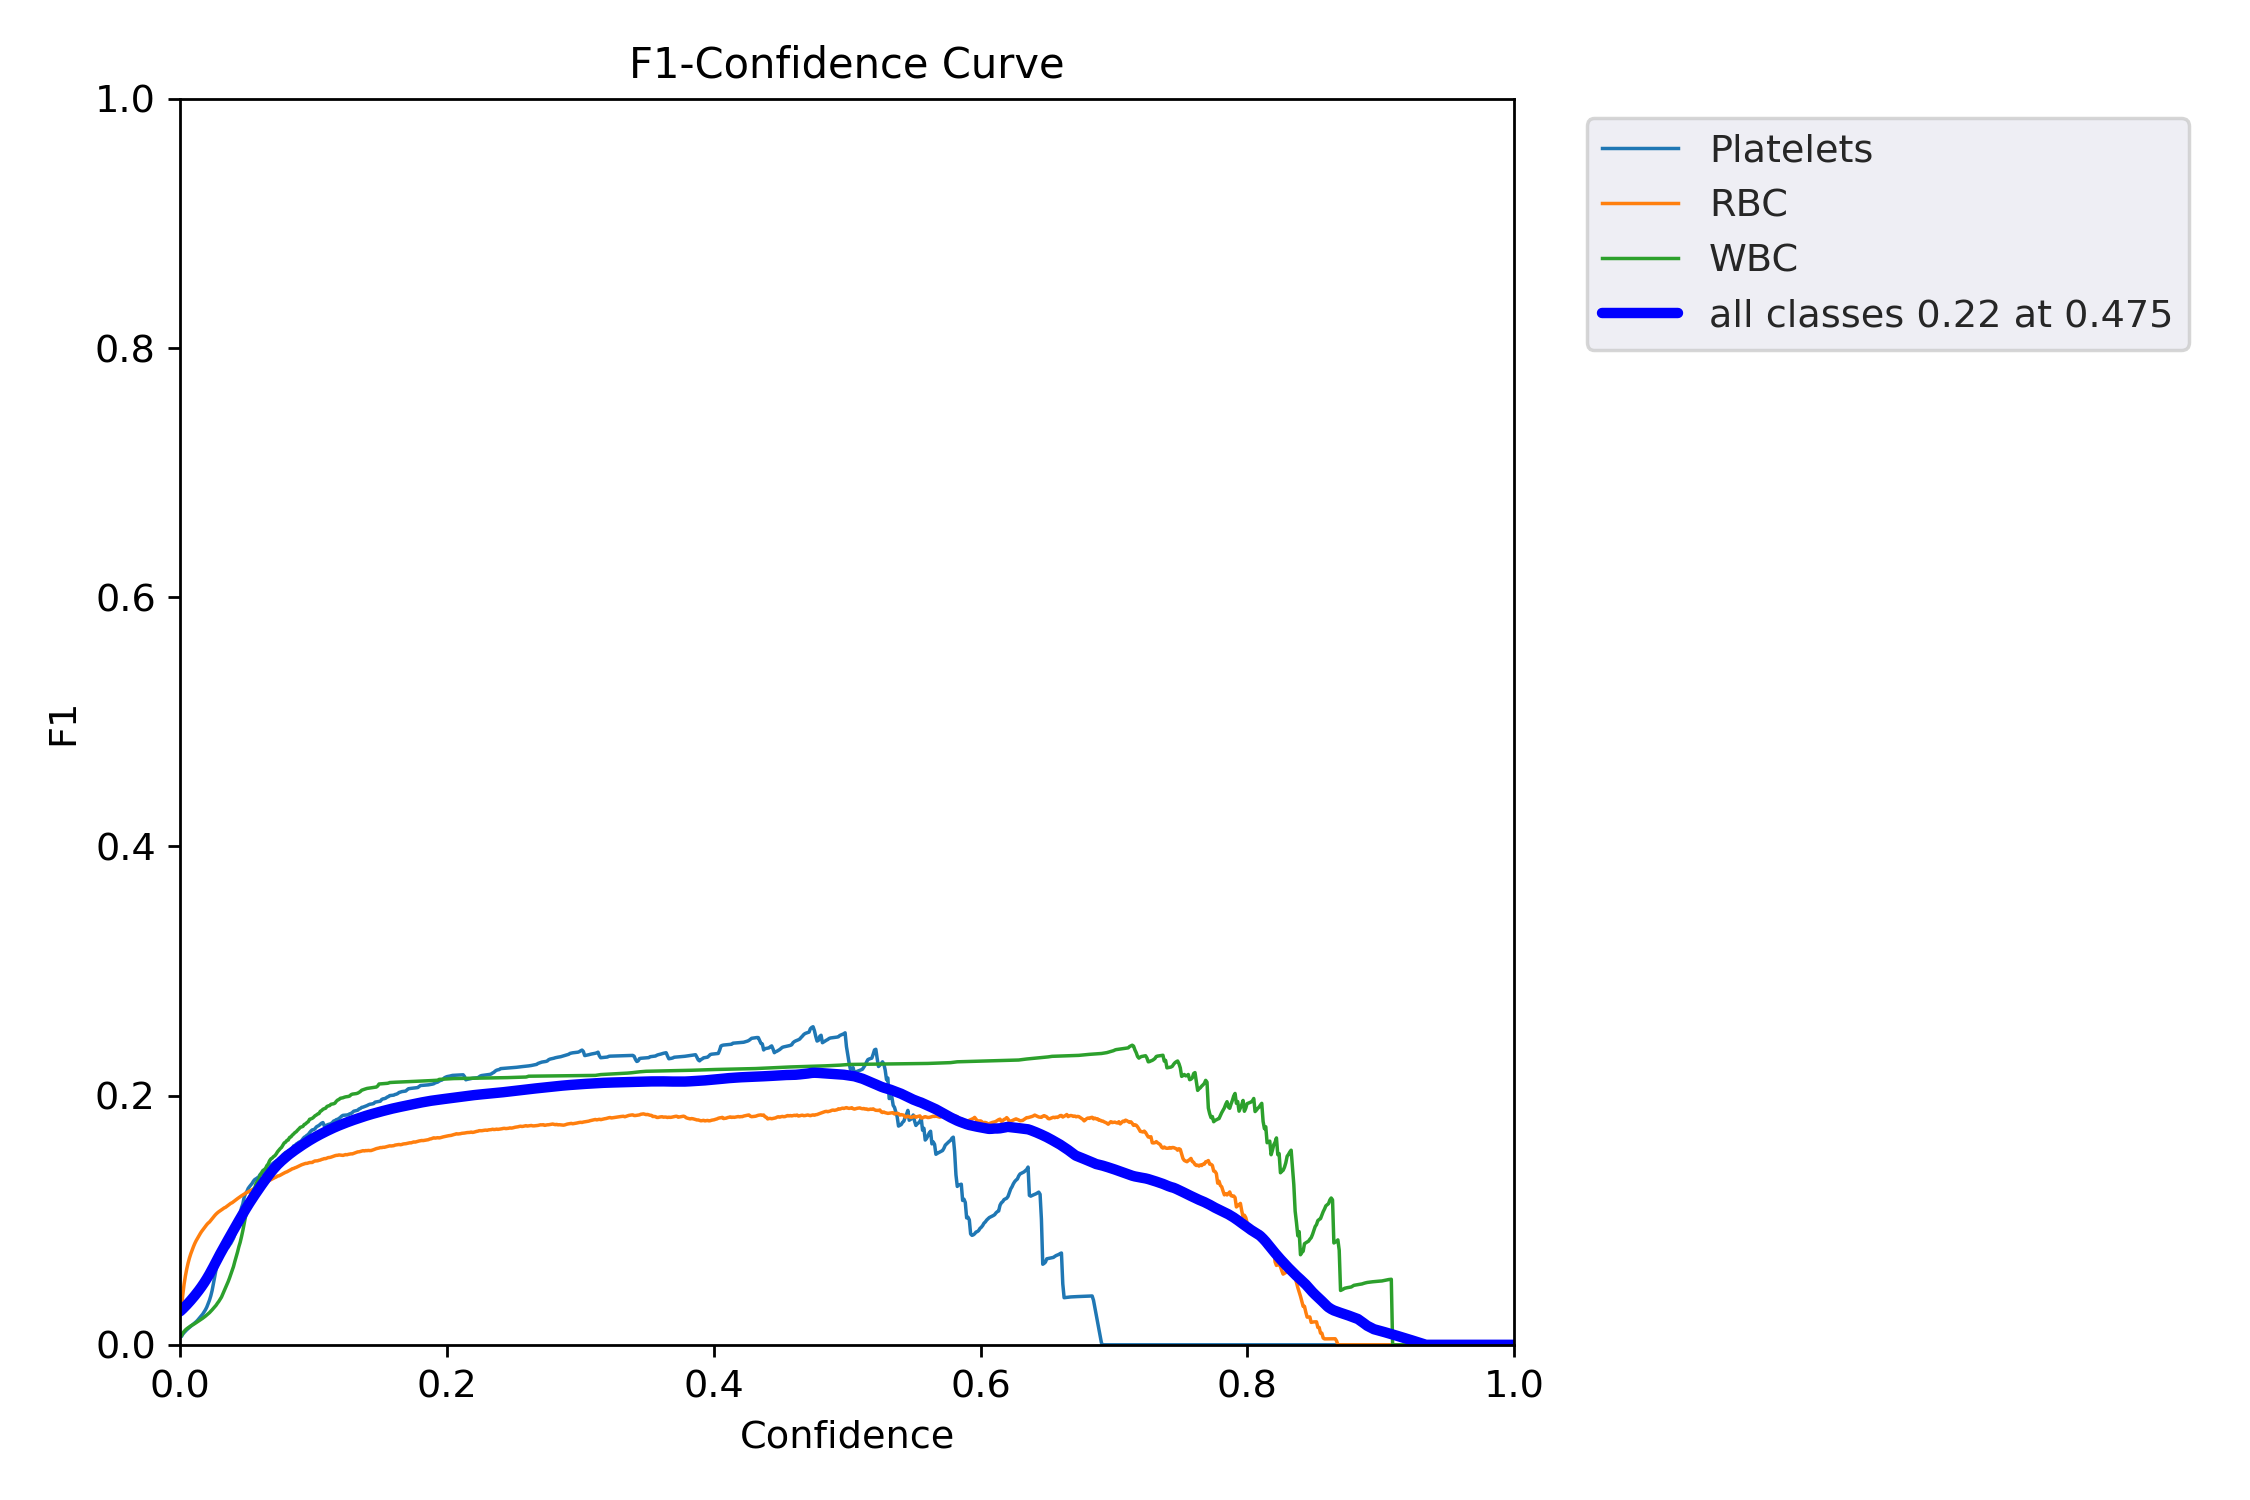

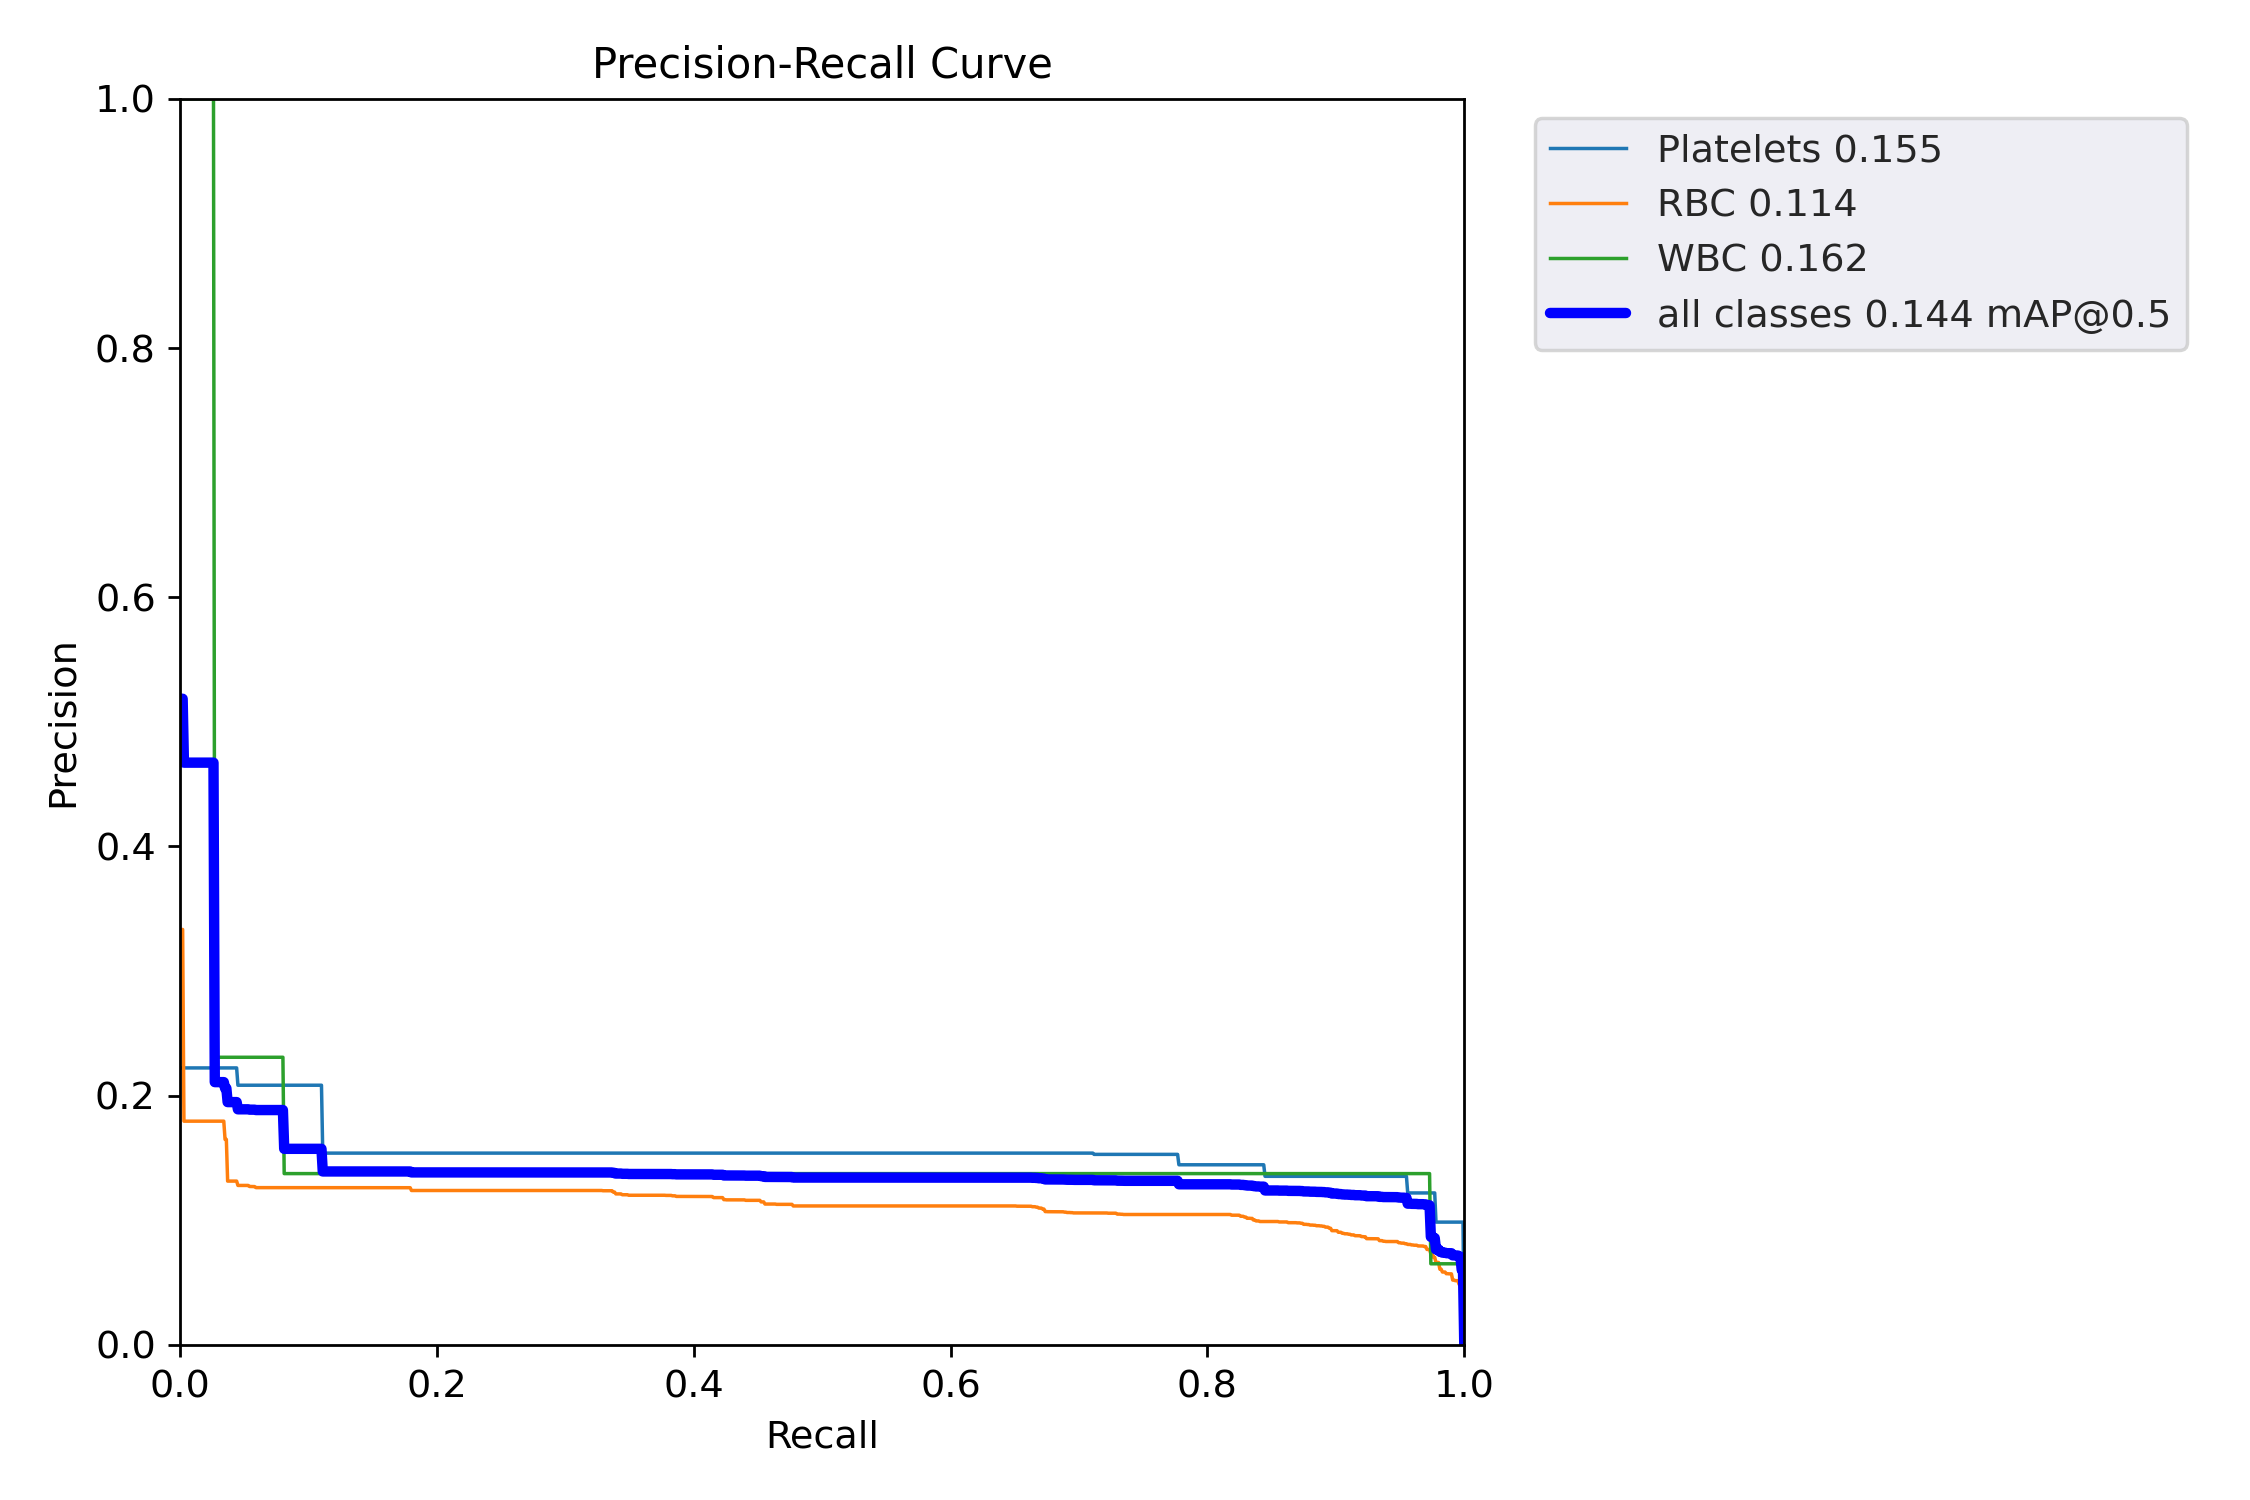

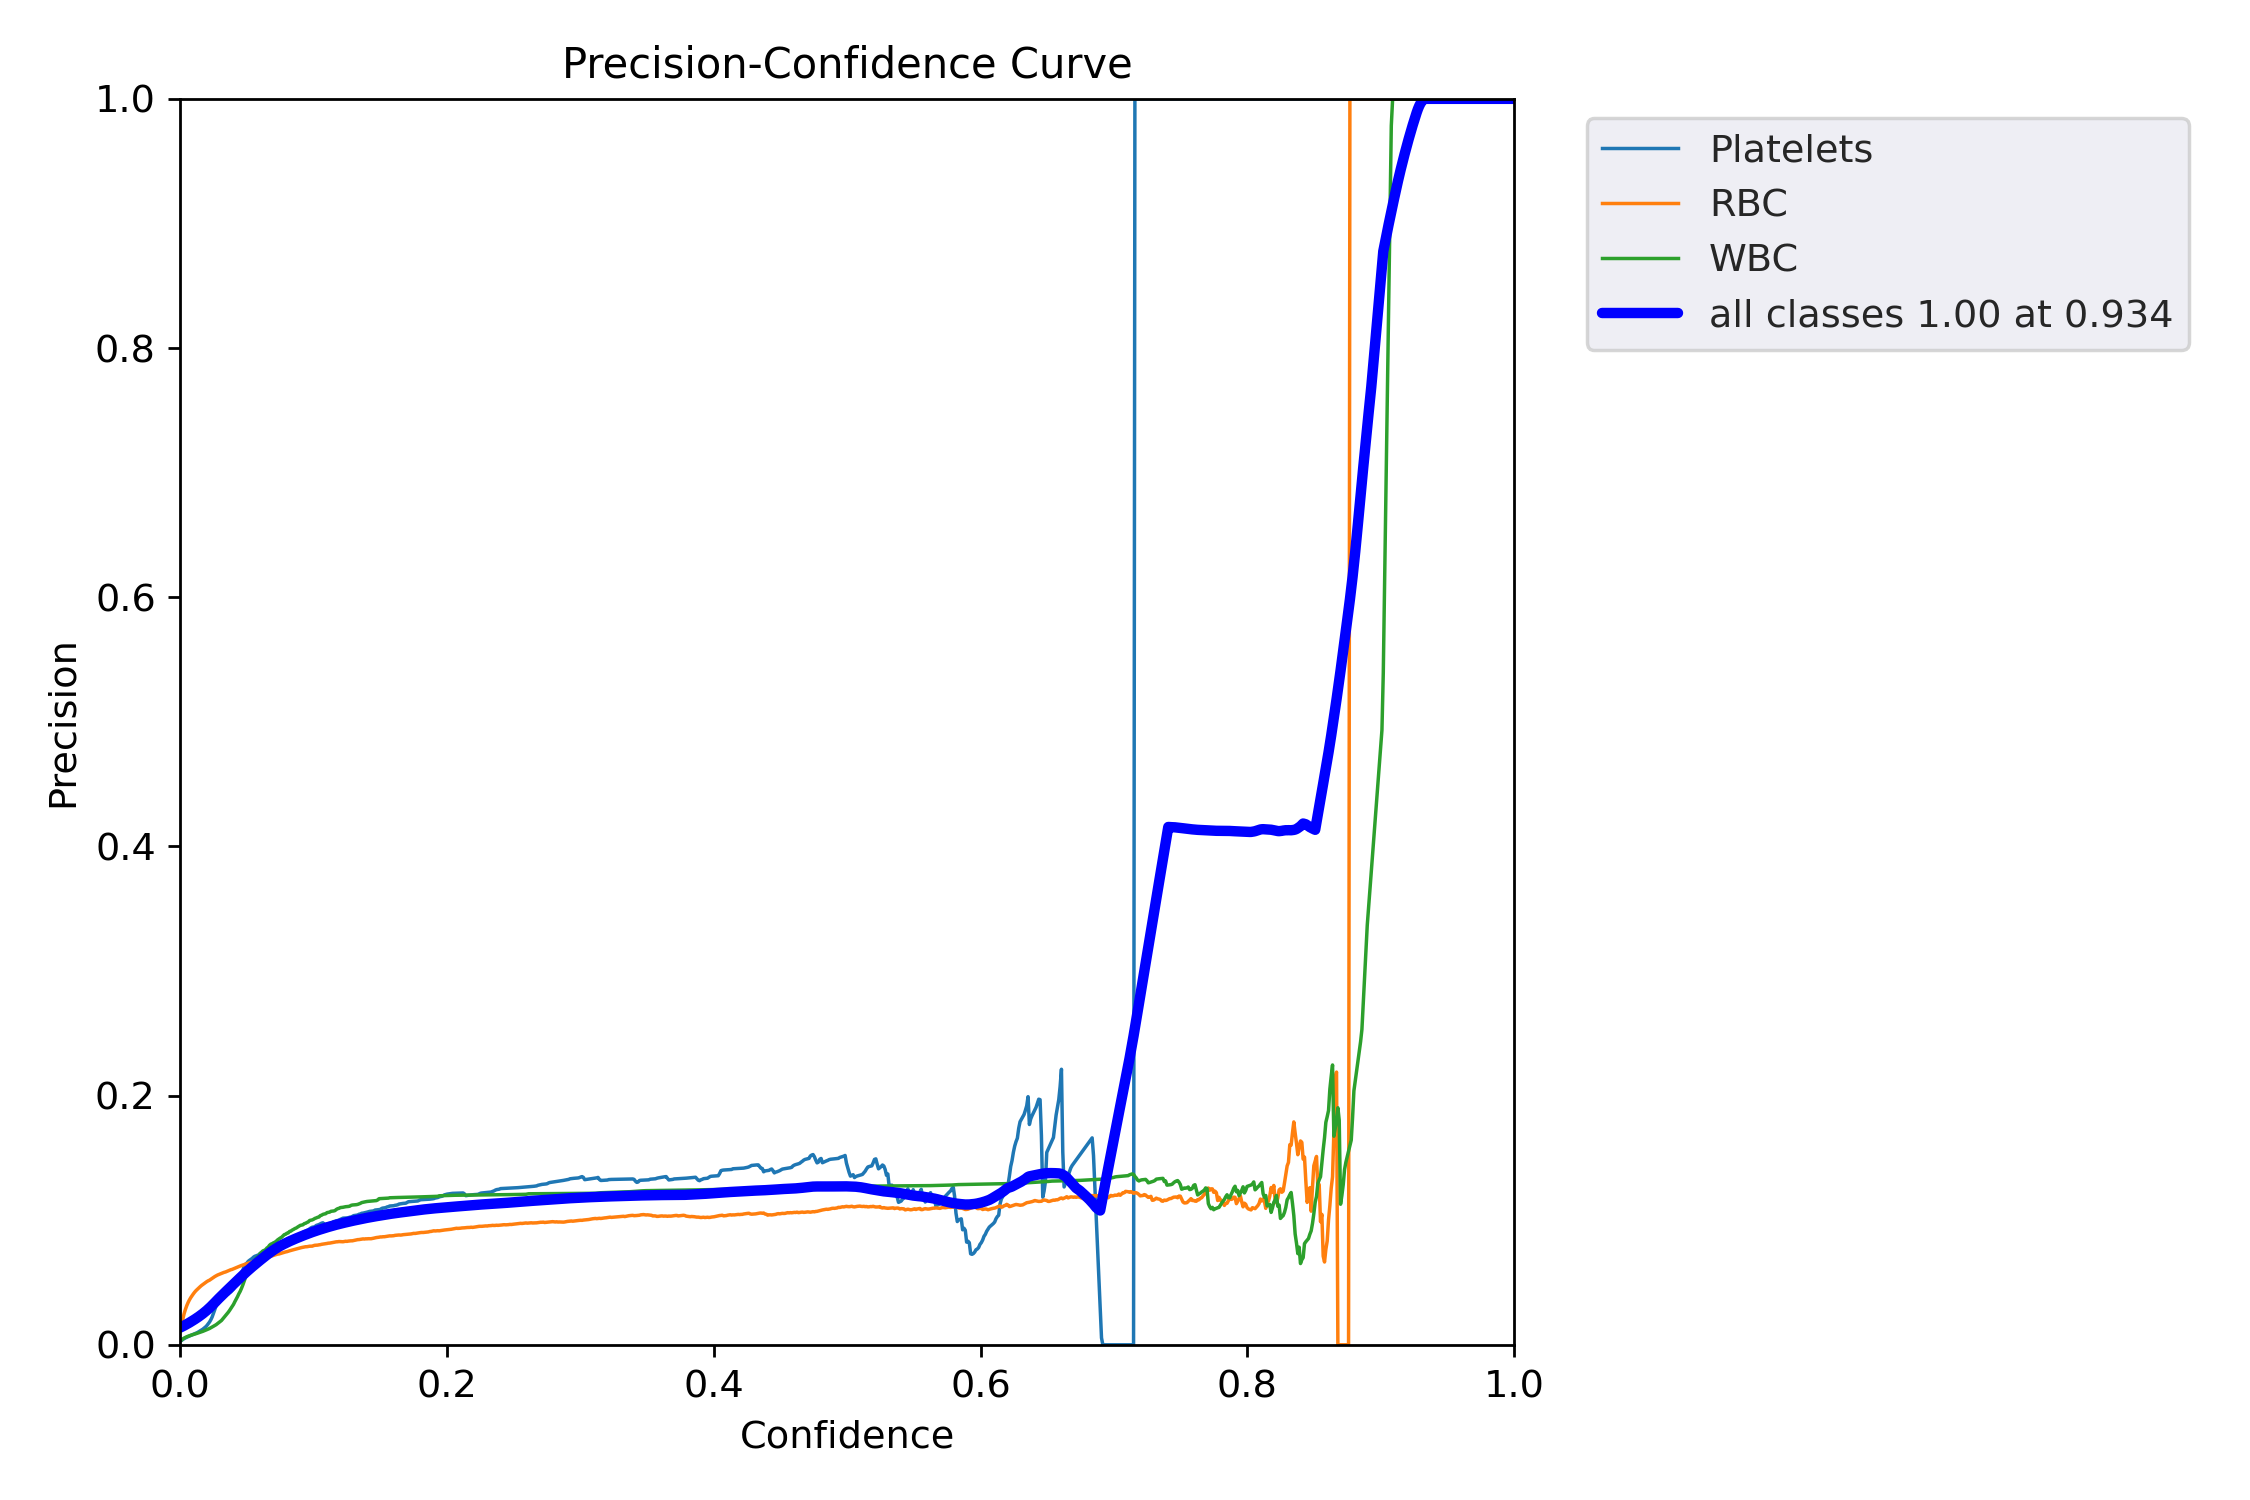

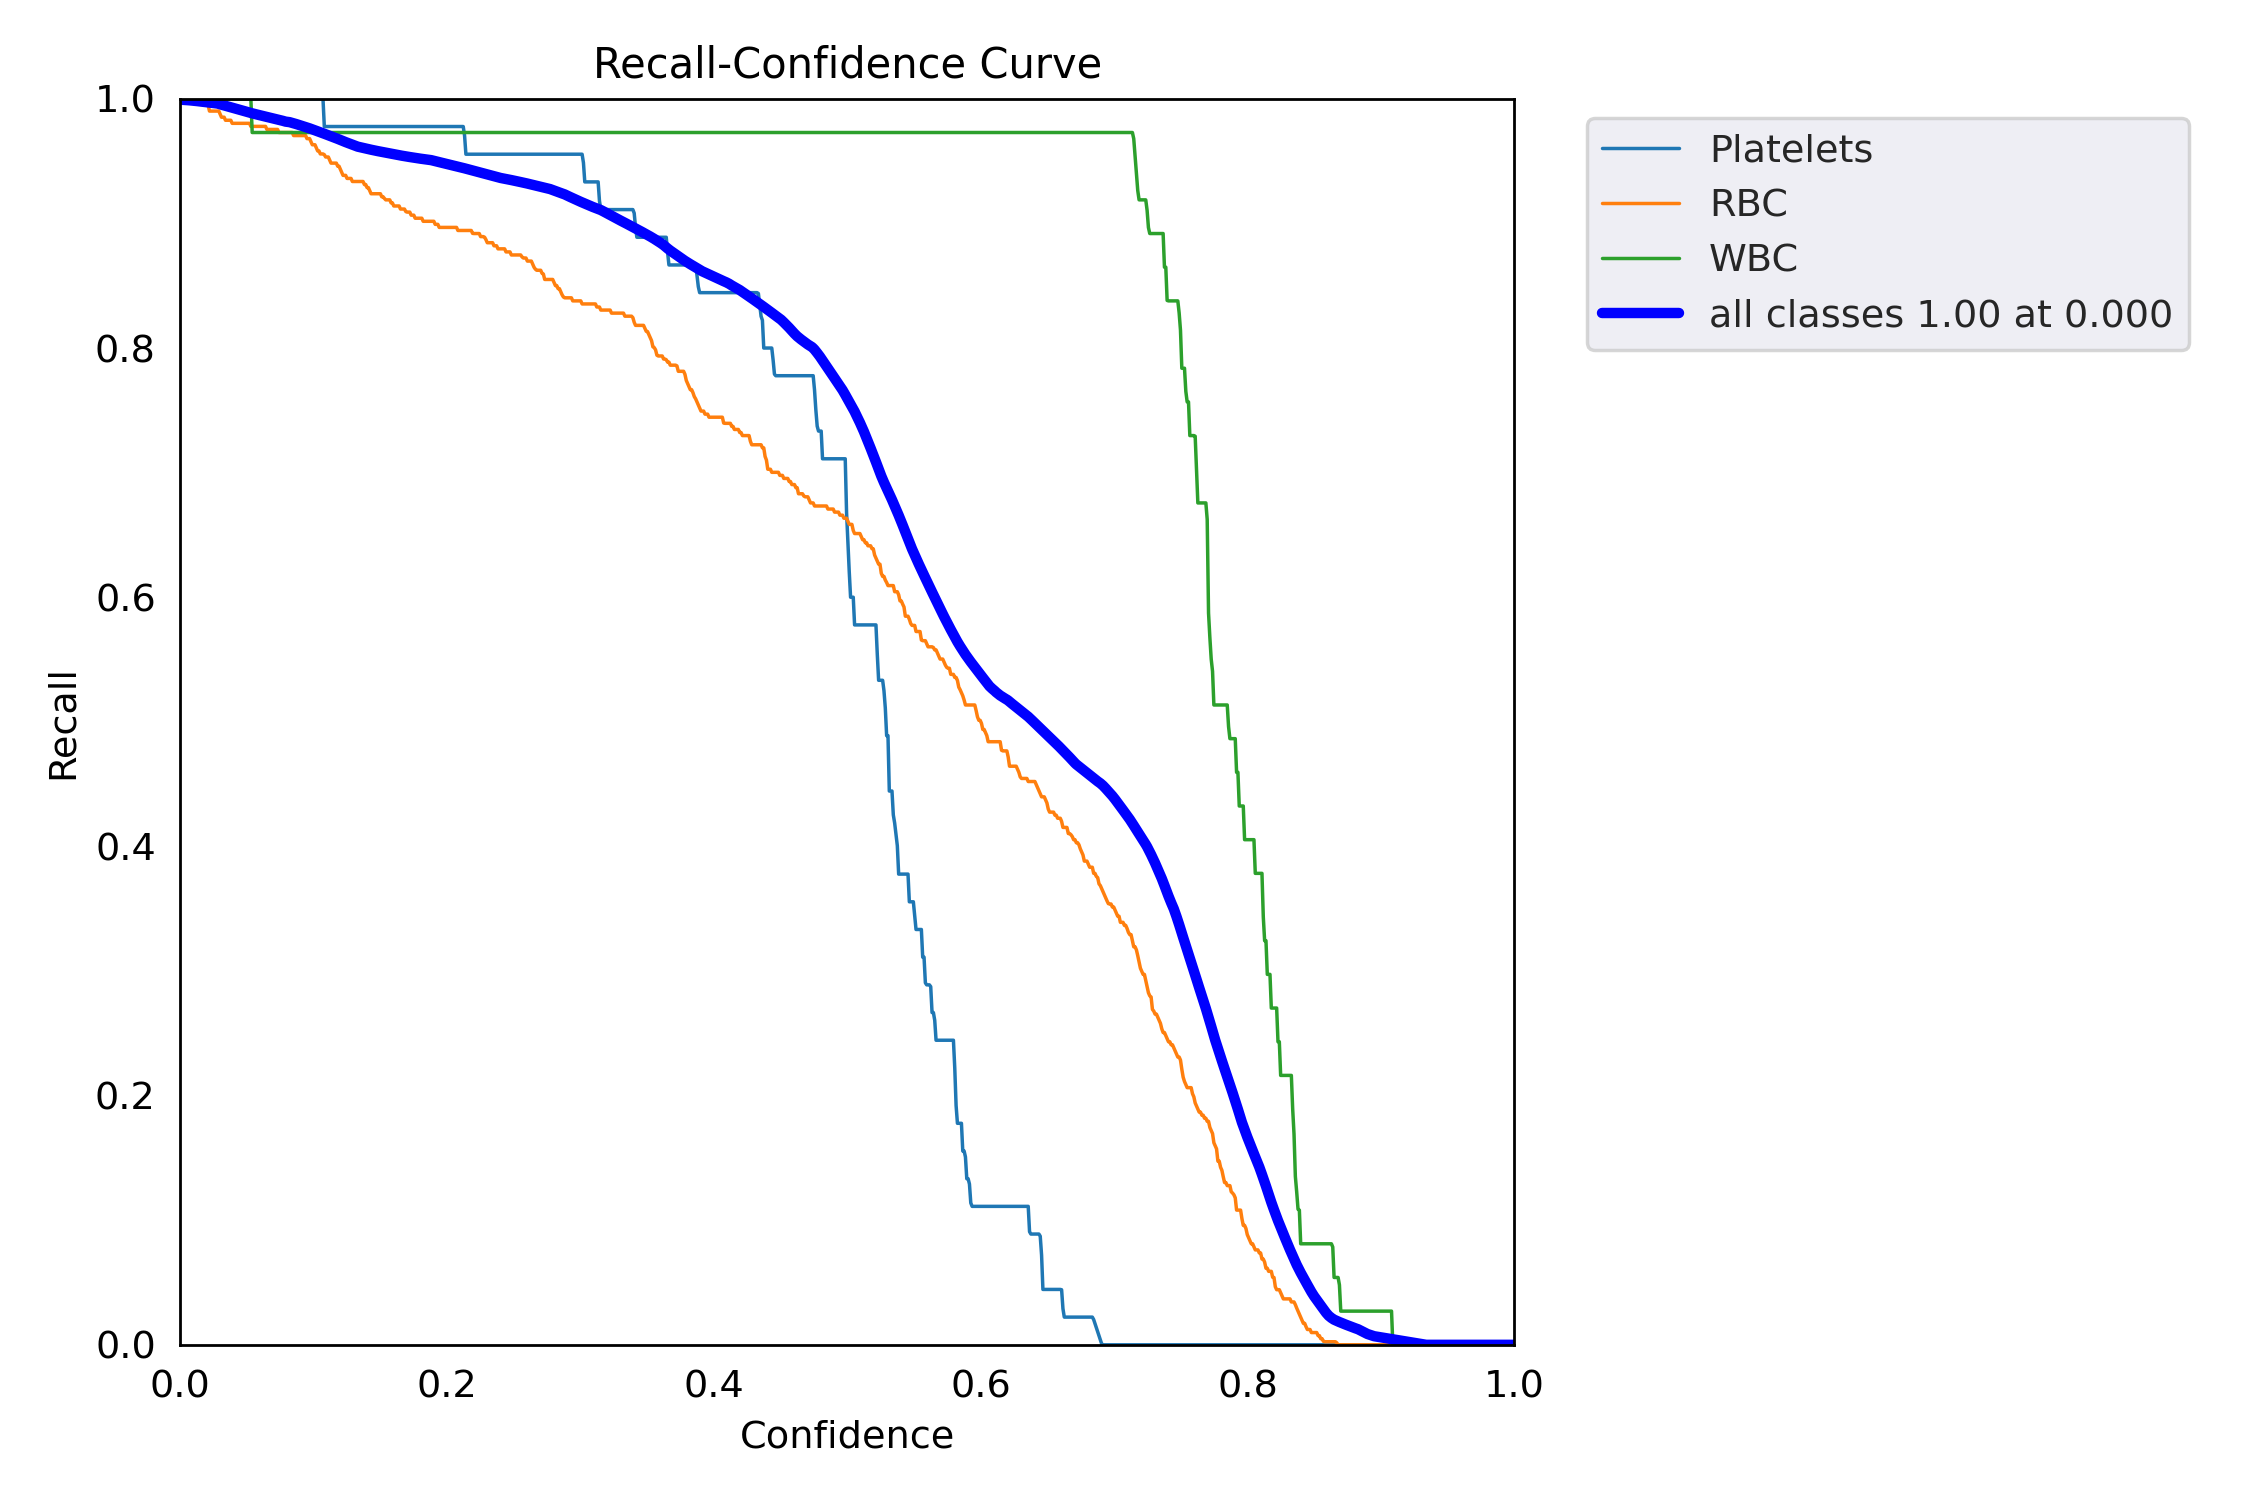

In [ ]:
import cv2
img1=cv2.imread("/content/yolov5/runs/train/BCCM/F1_curve.png")
img2=cv2.imread("/content/yolov5/runs/train/BCCM/PR_curve.png")
img3=cv2.imread("/content/yolov5/runs/train/BCCM/P_curve.png")
img4=cv2.imread("/content/yolov5/runs/train/BCCM/R_curve.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
%%time

!python '/content/yolov5/train.py'  --weights '/content/yolov5/yolov5m.pt' --img 640 --batch 8 --epochs 15 --data '/content/yolov5/bcc.yaml' --cfg '/content/yolov5/models/yolov5m.yaml'

train: weights=/content/yolov5/yolov5m.pt, cfg=/content/yolov5/models/yolov5m.yaml, data=/content/yolov5/bcc.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results 
from utils.plots import plot_results;
plot_results("/content/yolov5/runs/train/exp/results.csv") ## give ur csv path
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

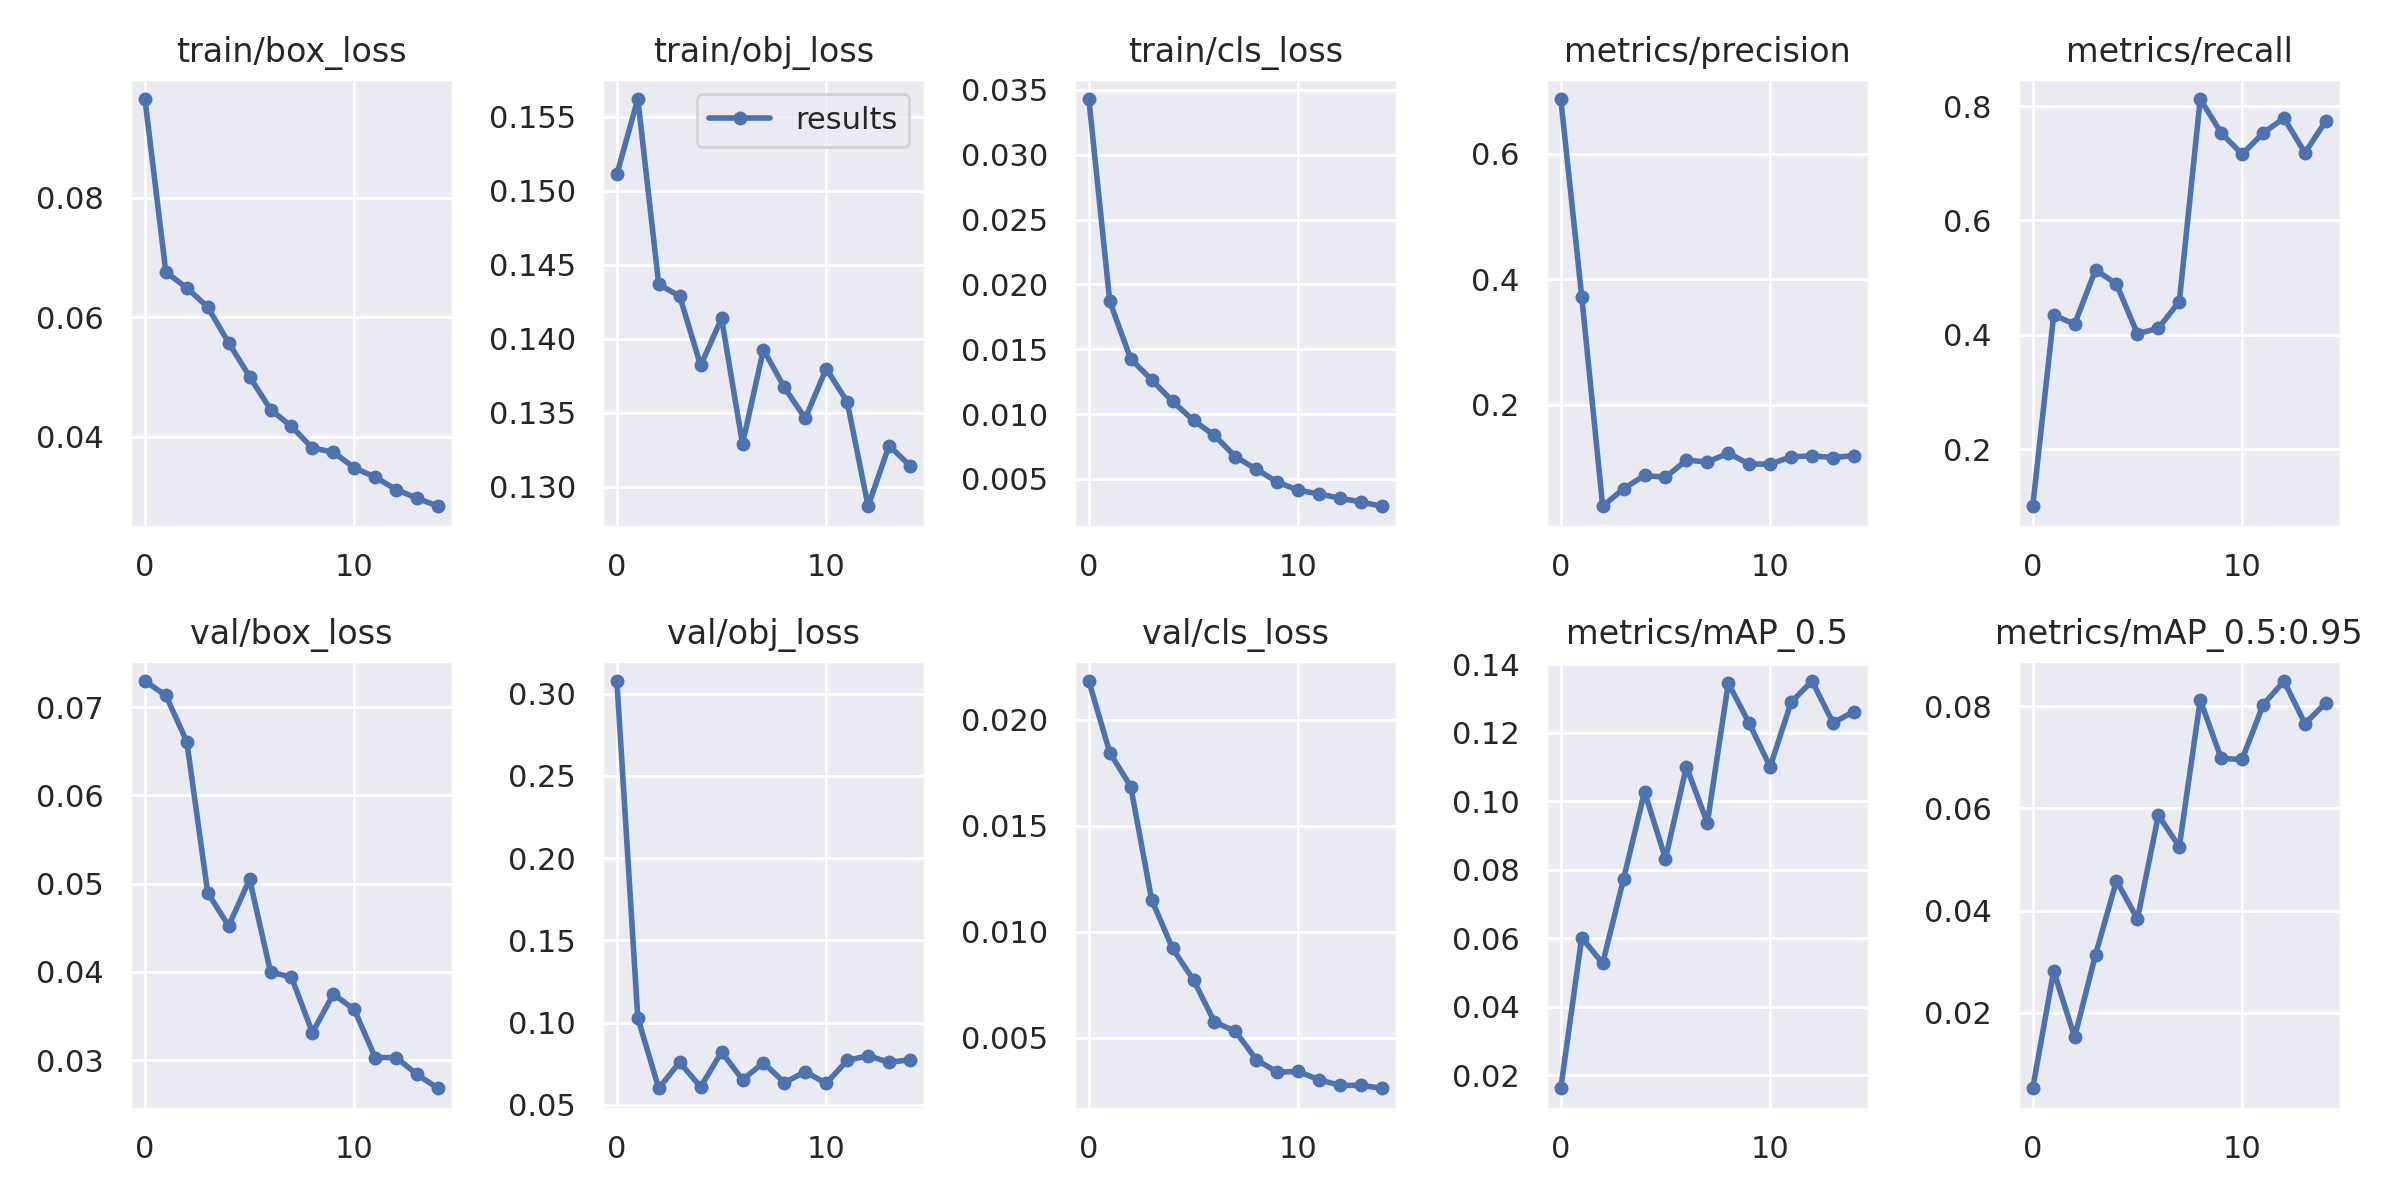

In [ ]:
import cv2
img=cv2.imread("/content/yolov5/runs/train/exp/results.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

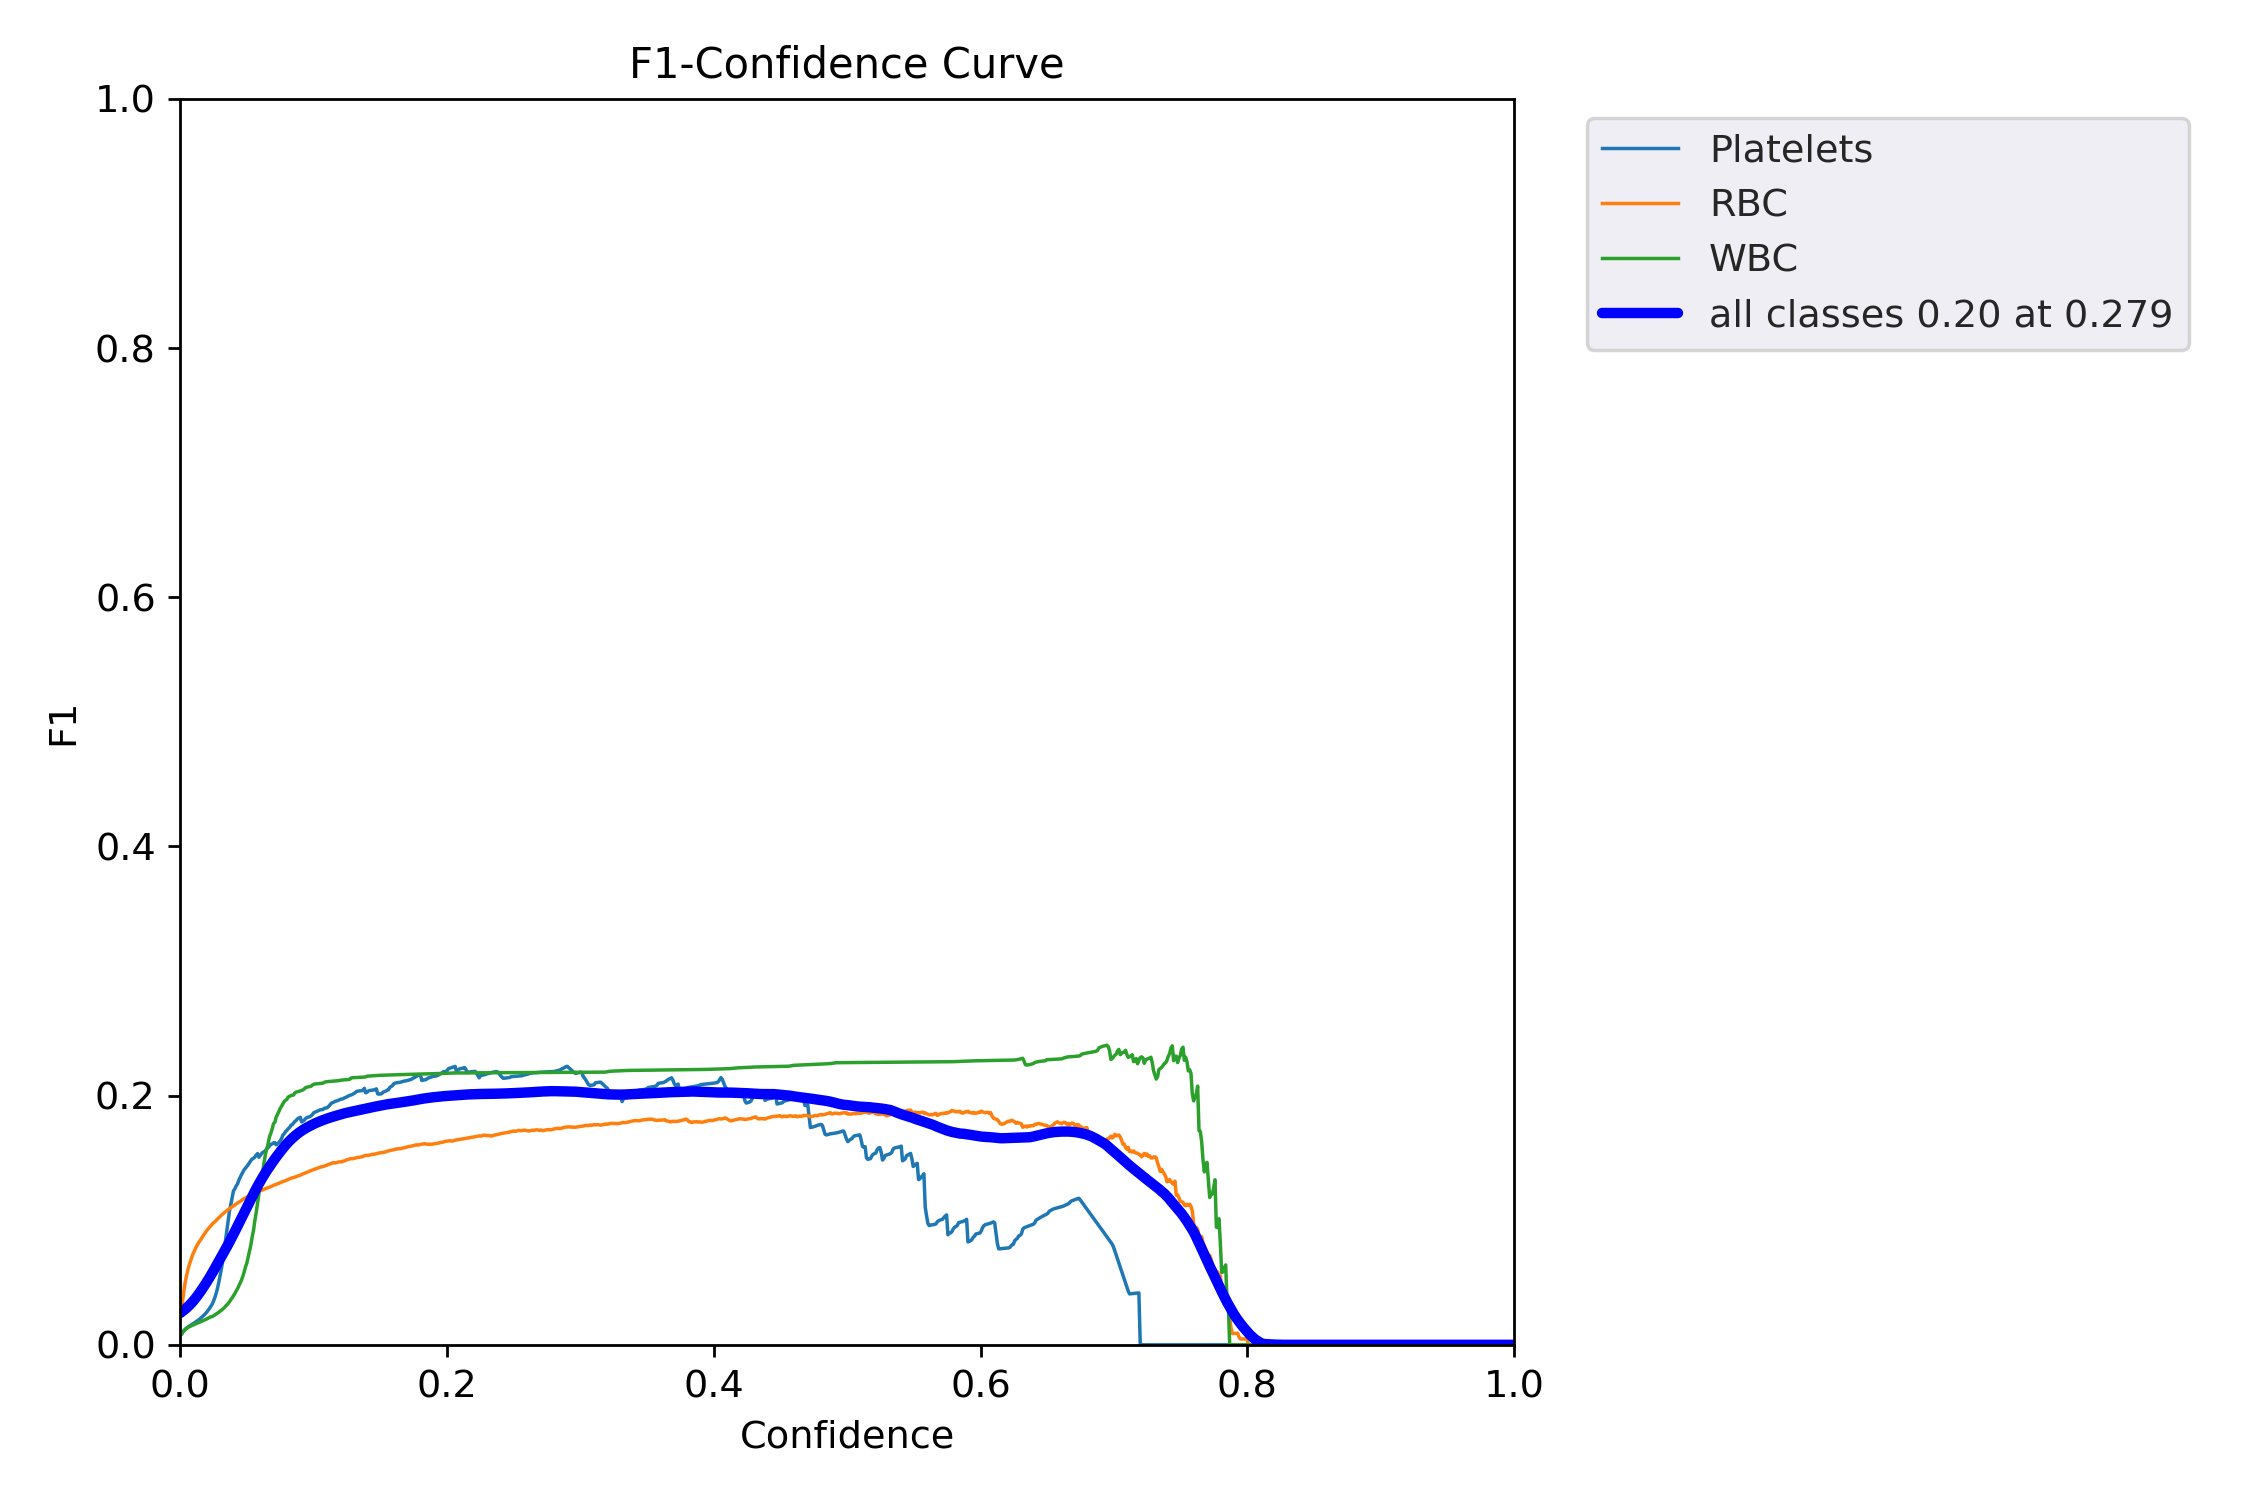

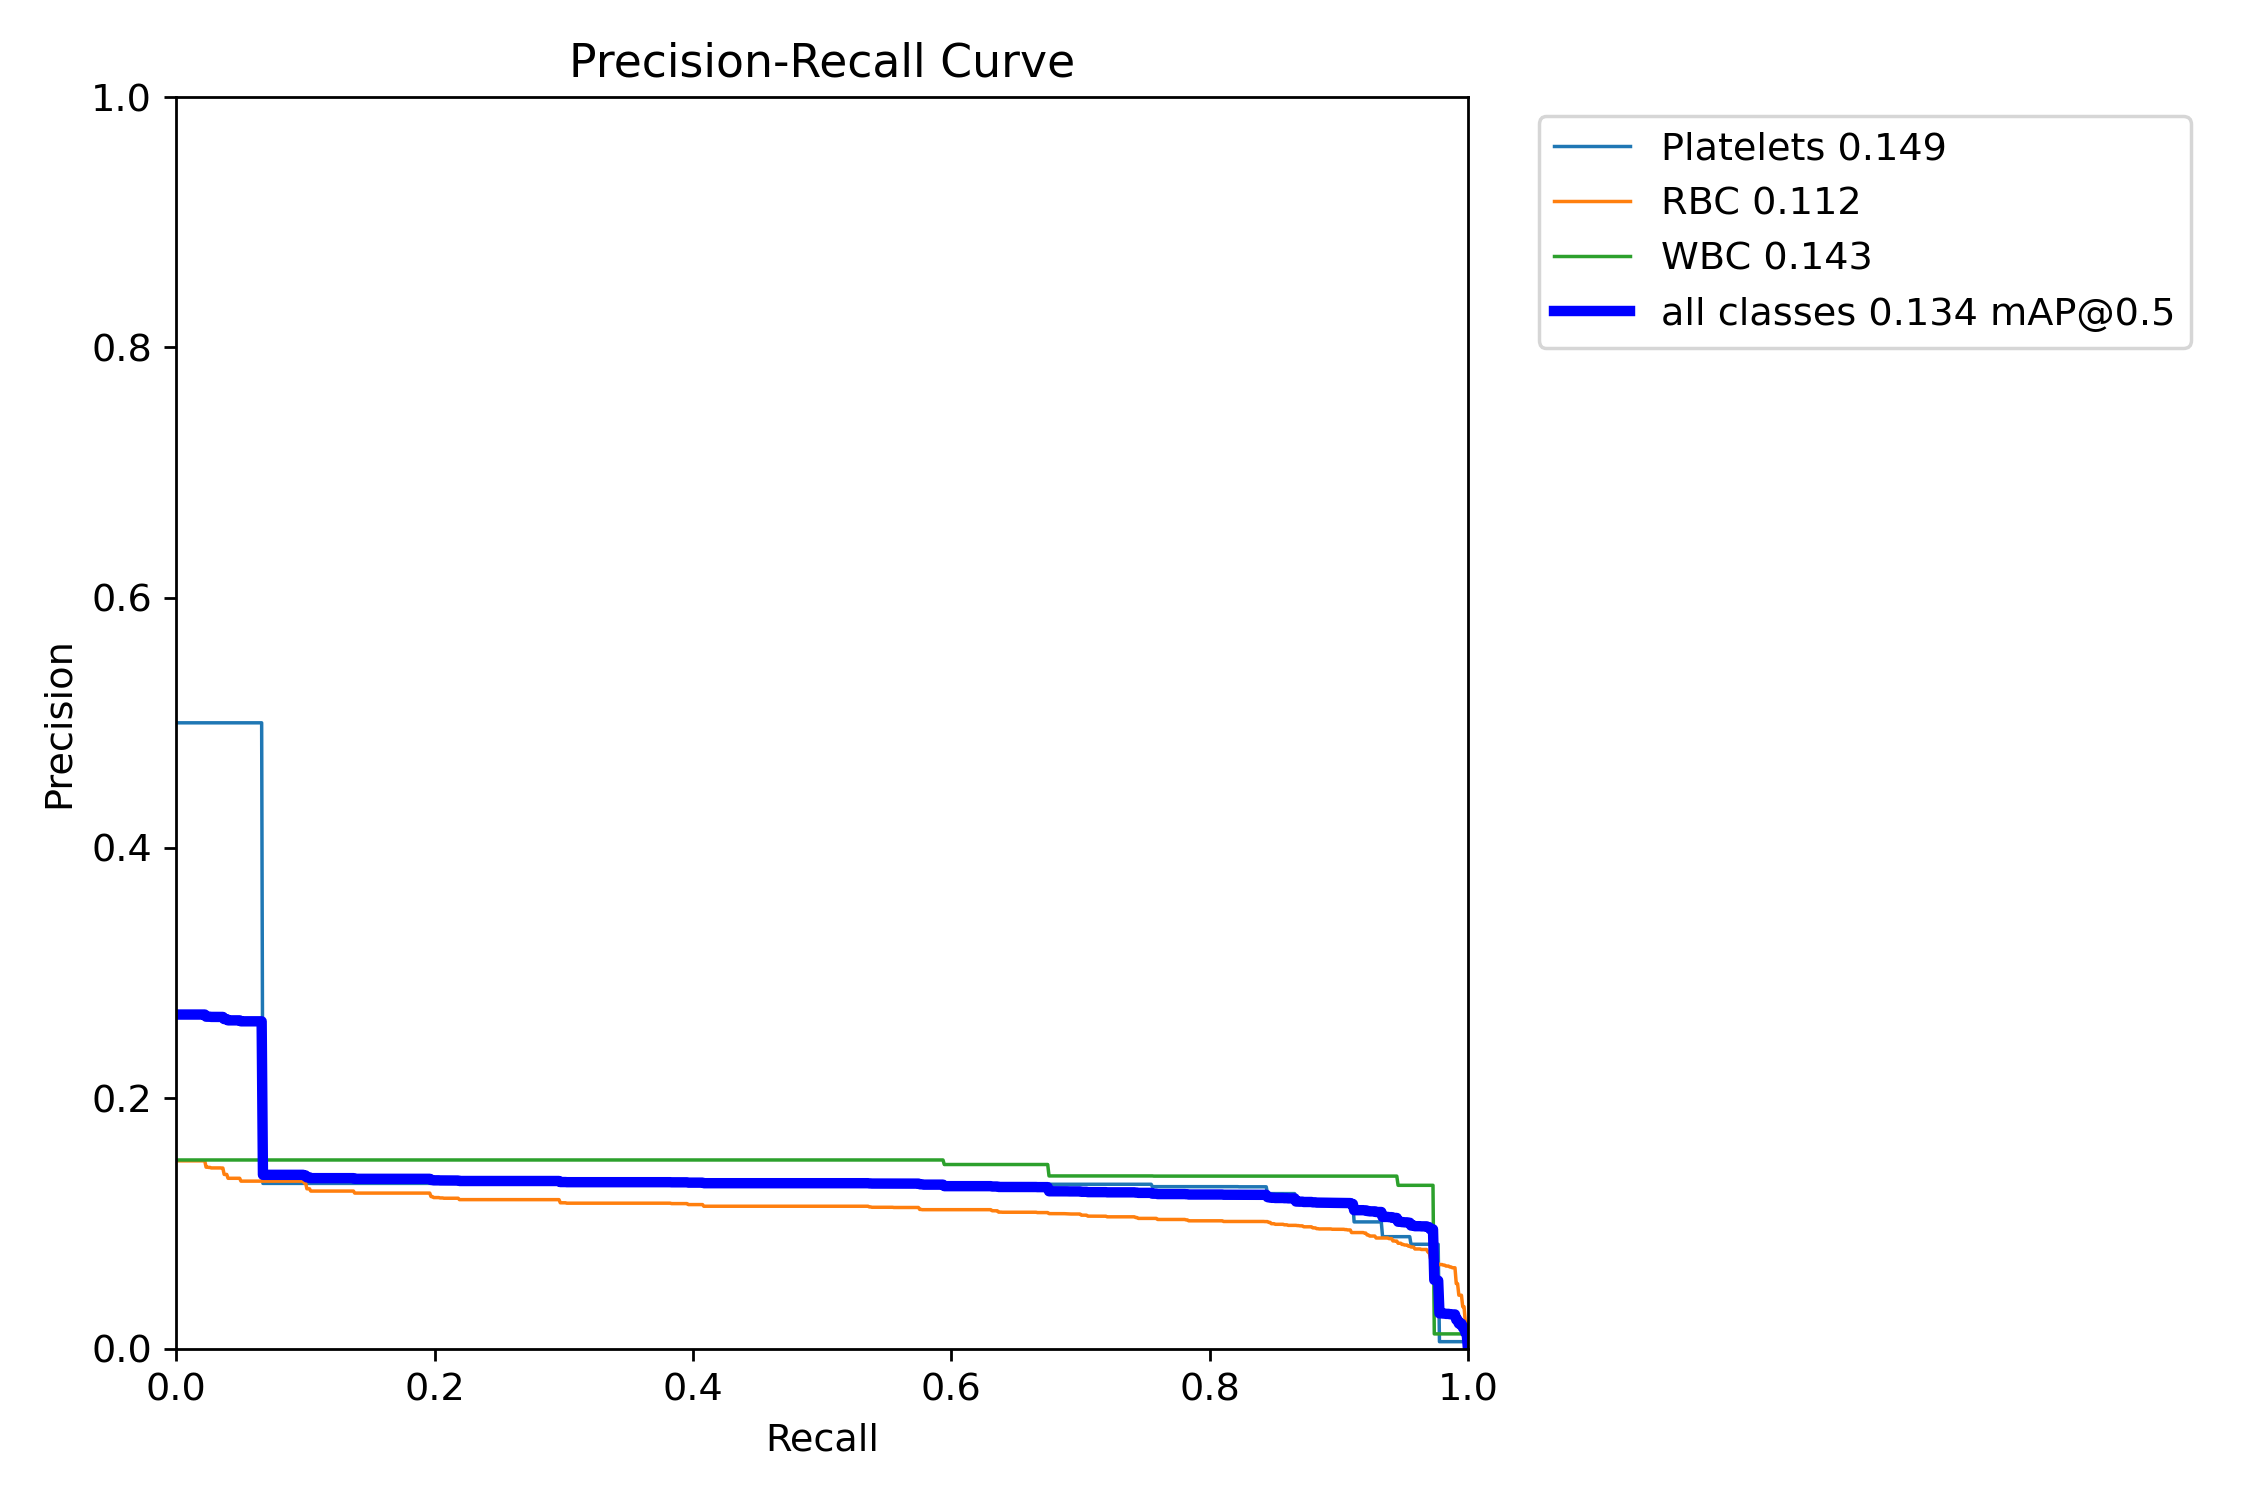

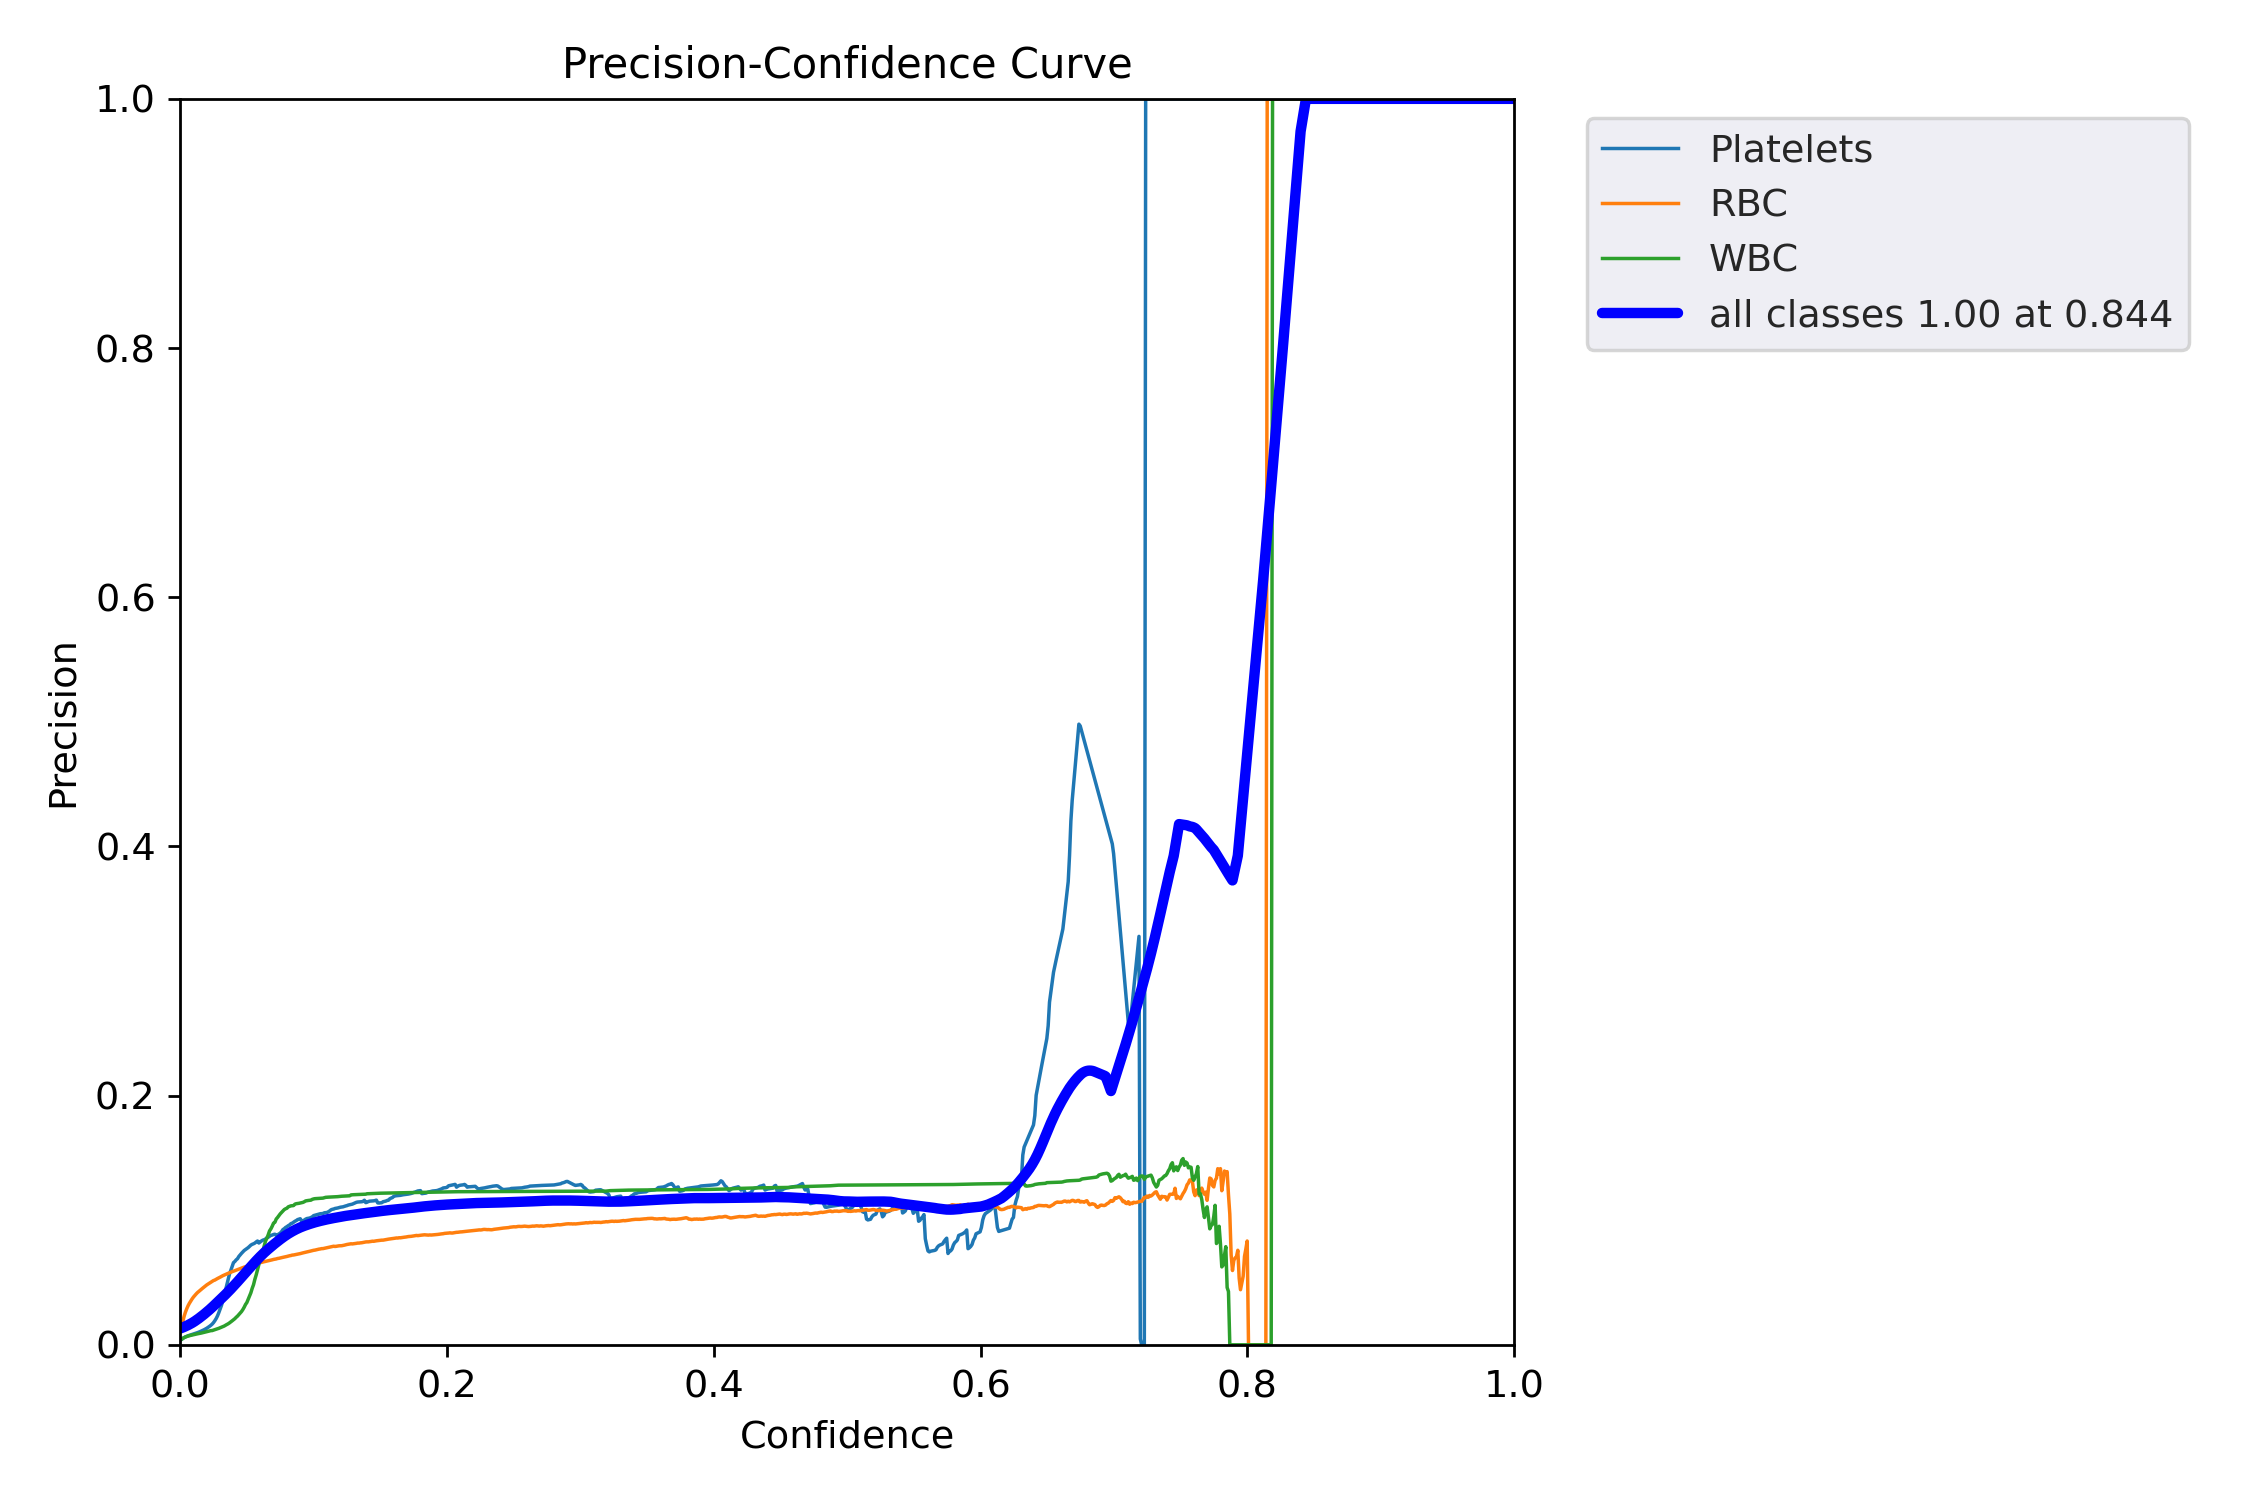

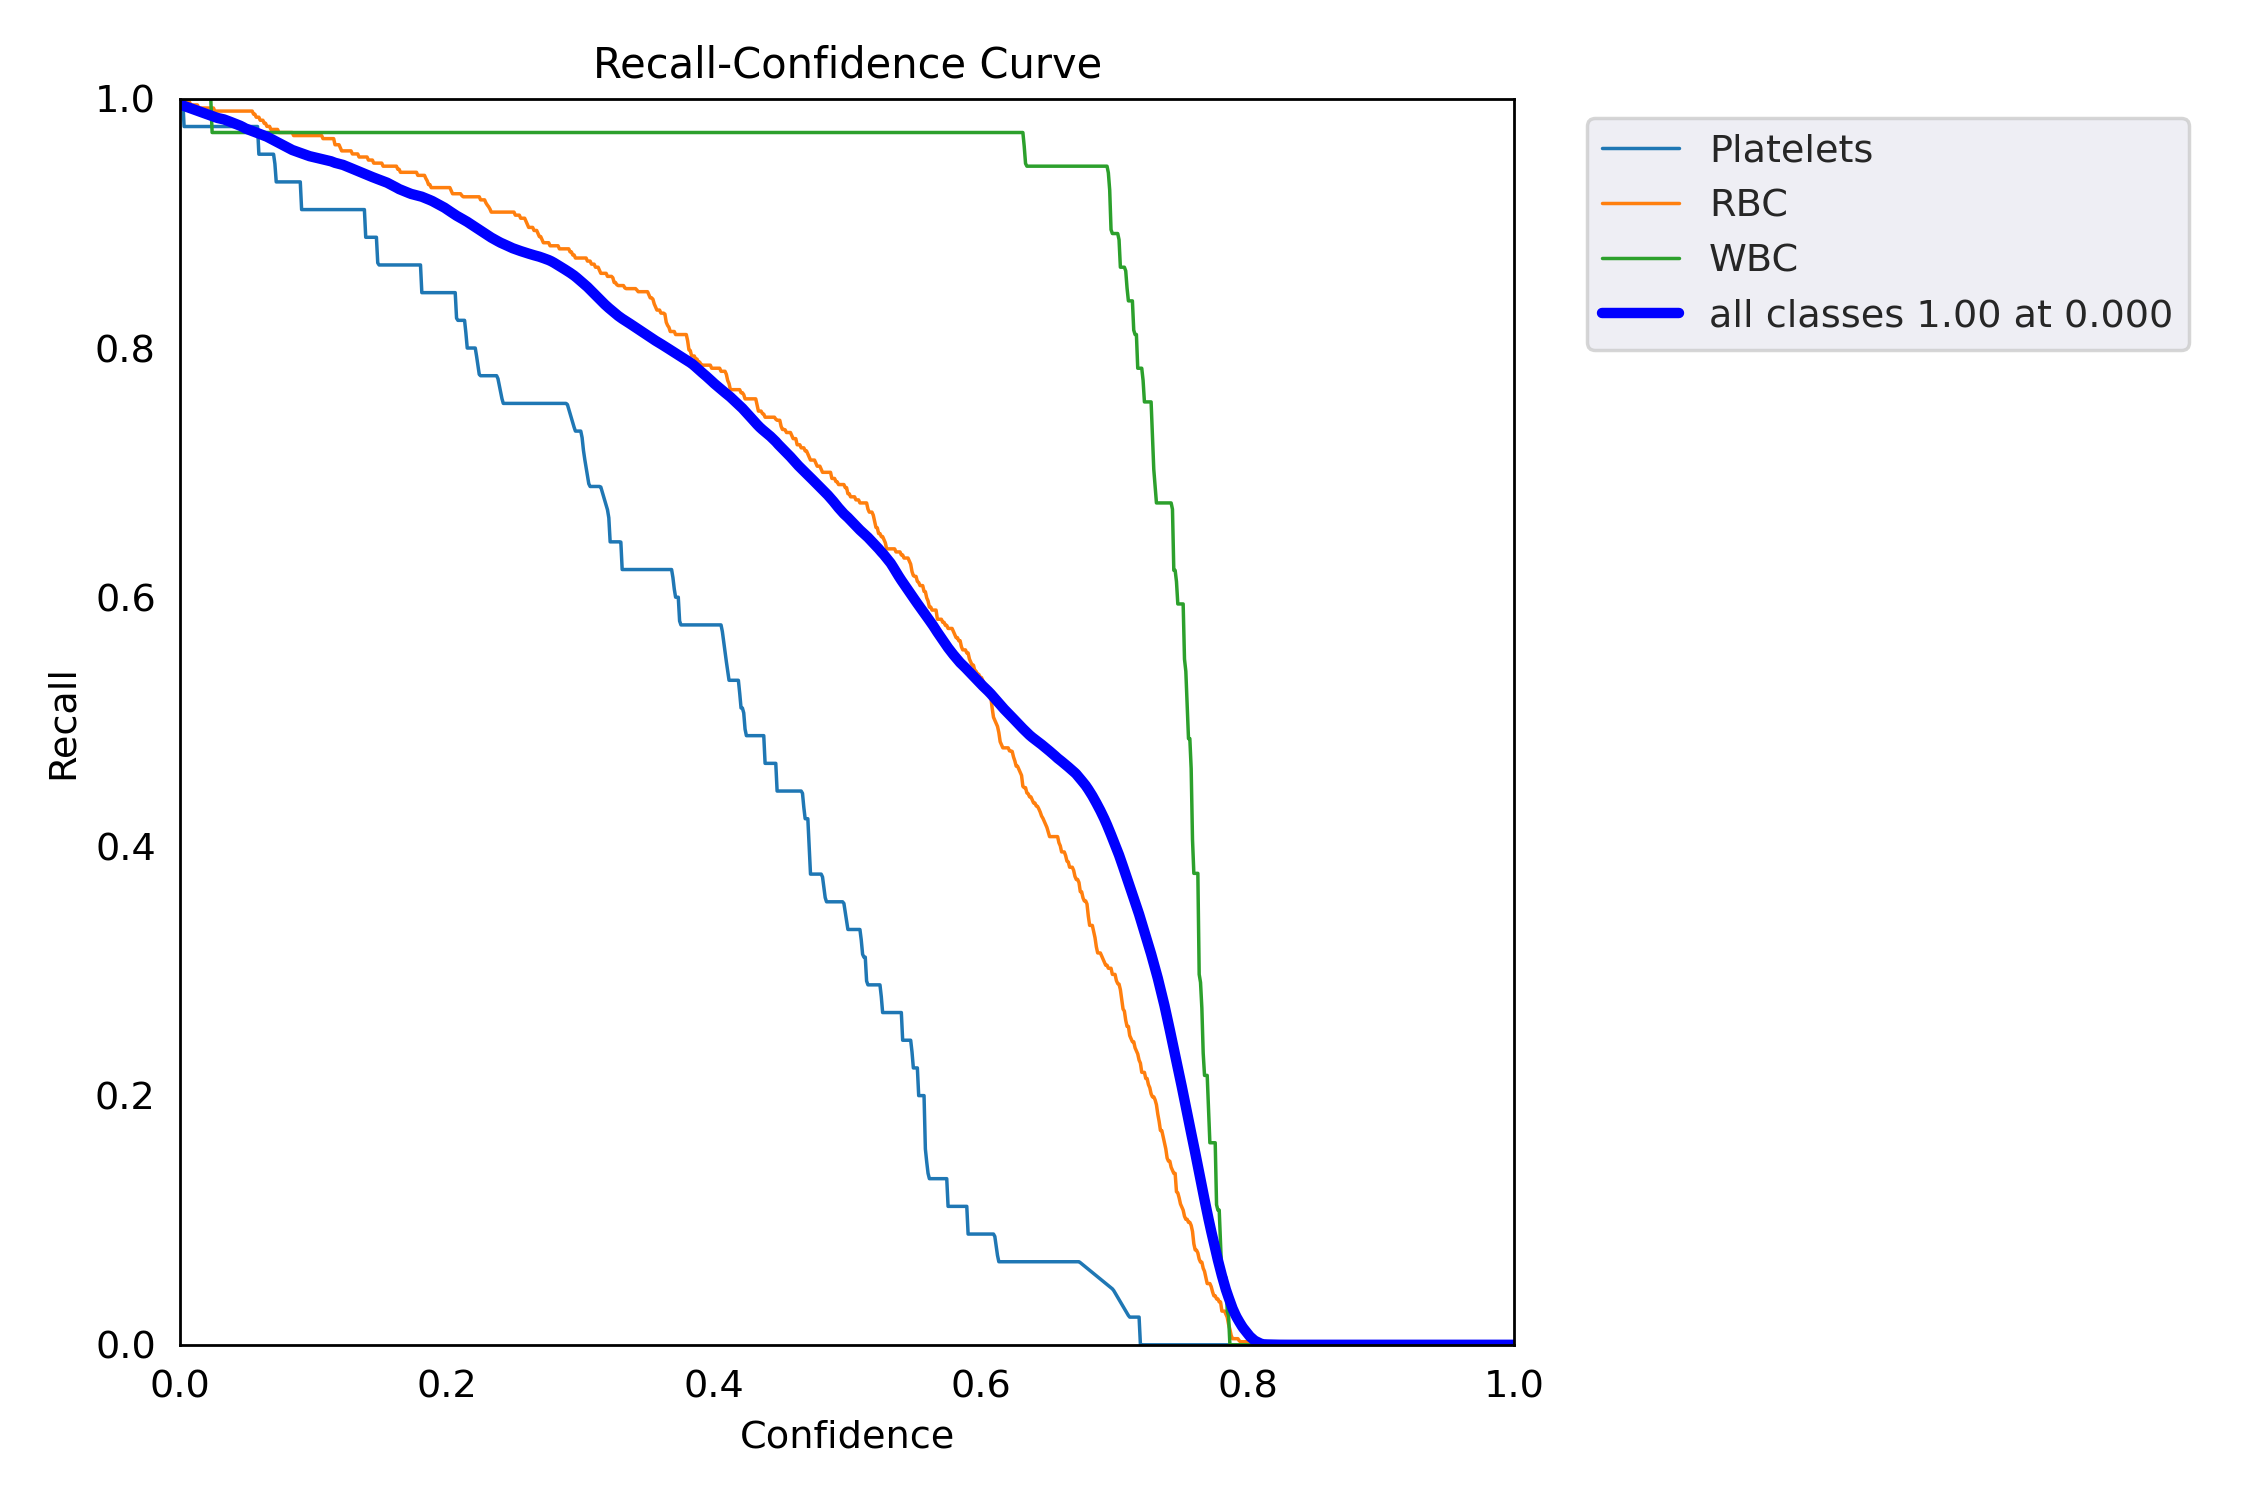

In [ ]:
import cv2
img1=cv2.imread("/content/yolov5/runs/train/exp/F1_curve.png")
img2=cv2.imread("/content/yolov5/runs/train/exp/PR_curve.png")
img3=cv2.imread("/content/yolov5/runs/train/exp/P_curve.png")
img4=cv2.imread("/content/yolov5/runs/train/exp/R_curve.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

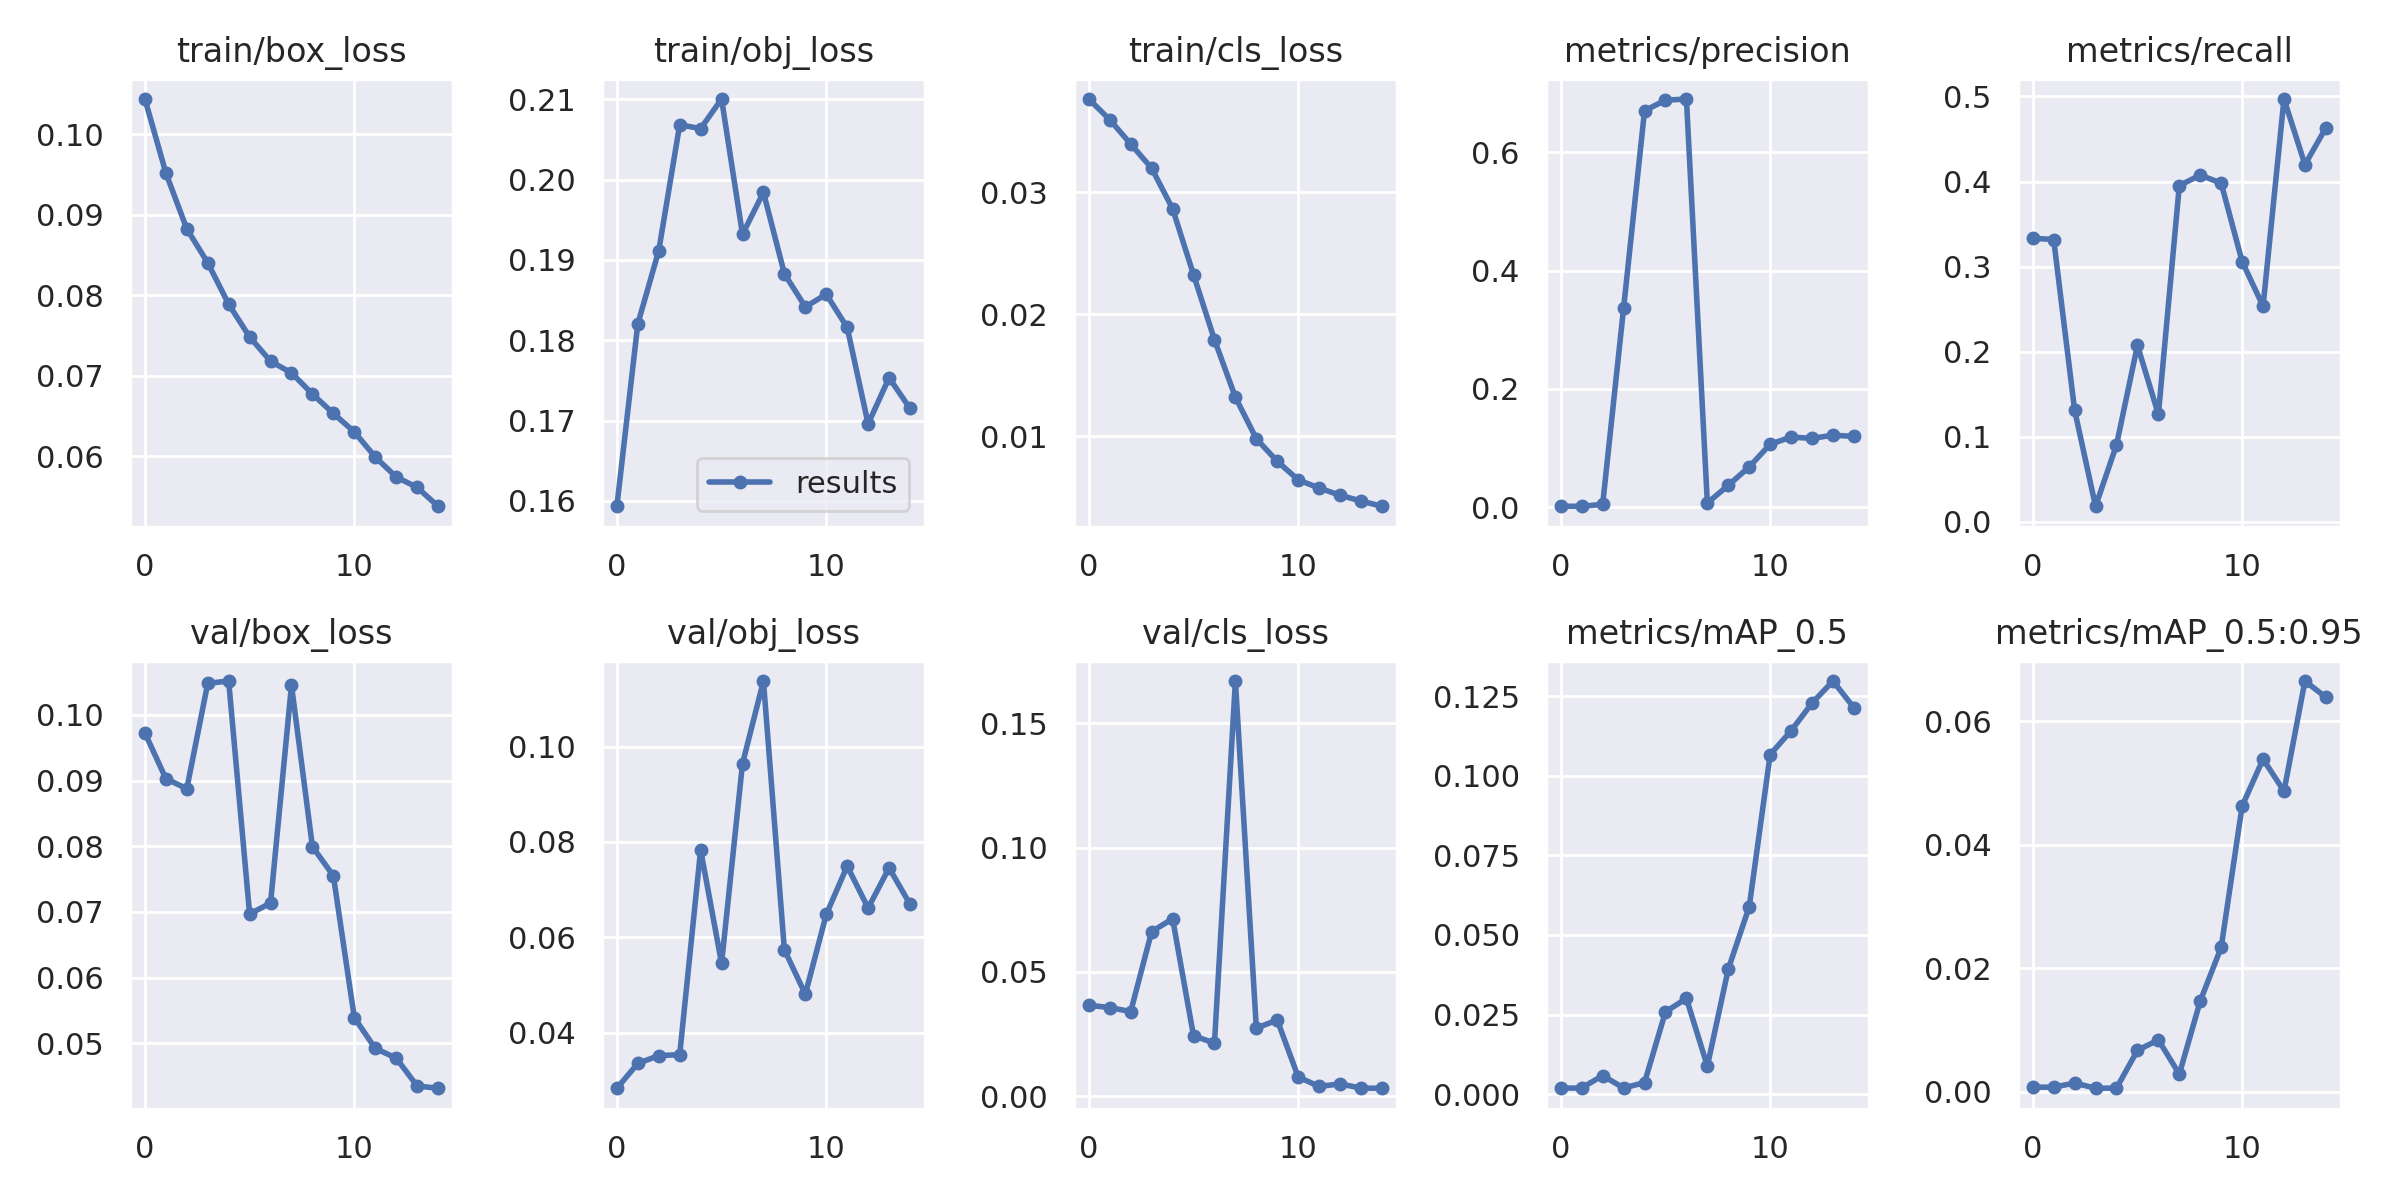

In [ ]:
import cv2
img=cv2.imread("/content/yolov5/runs/train/BCCM3/results.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

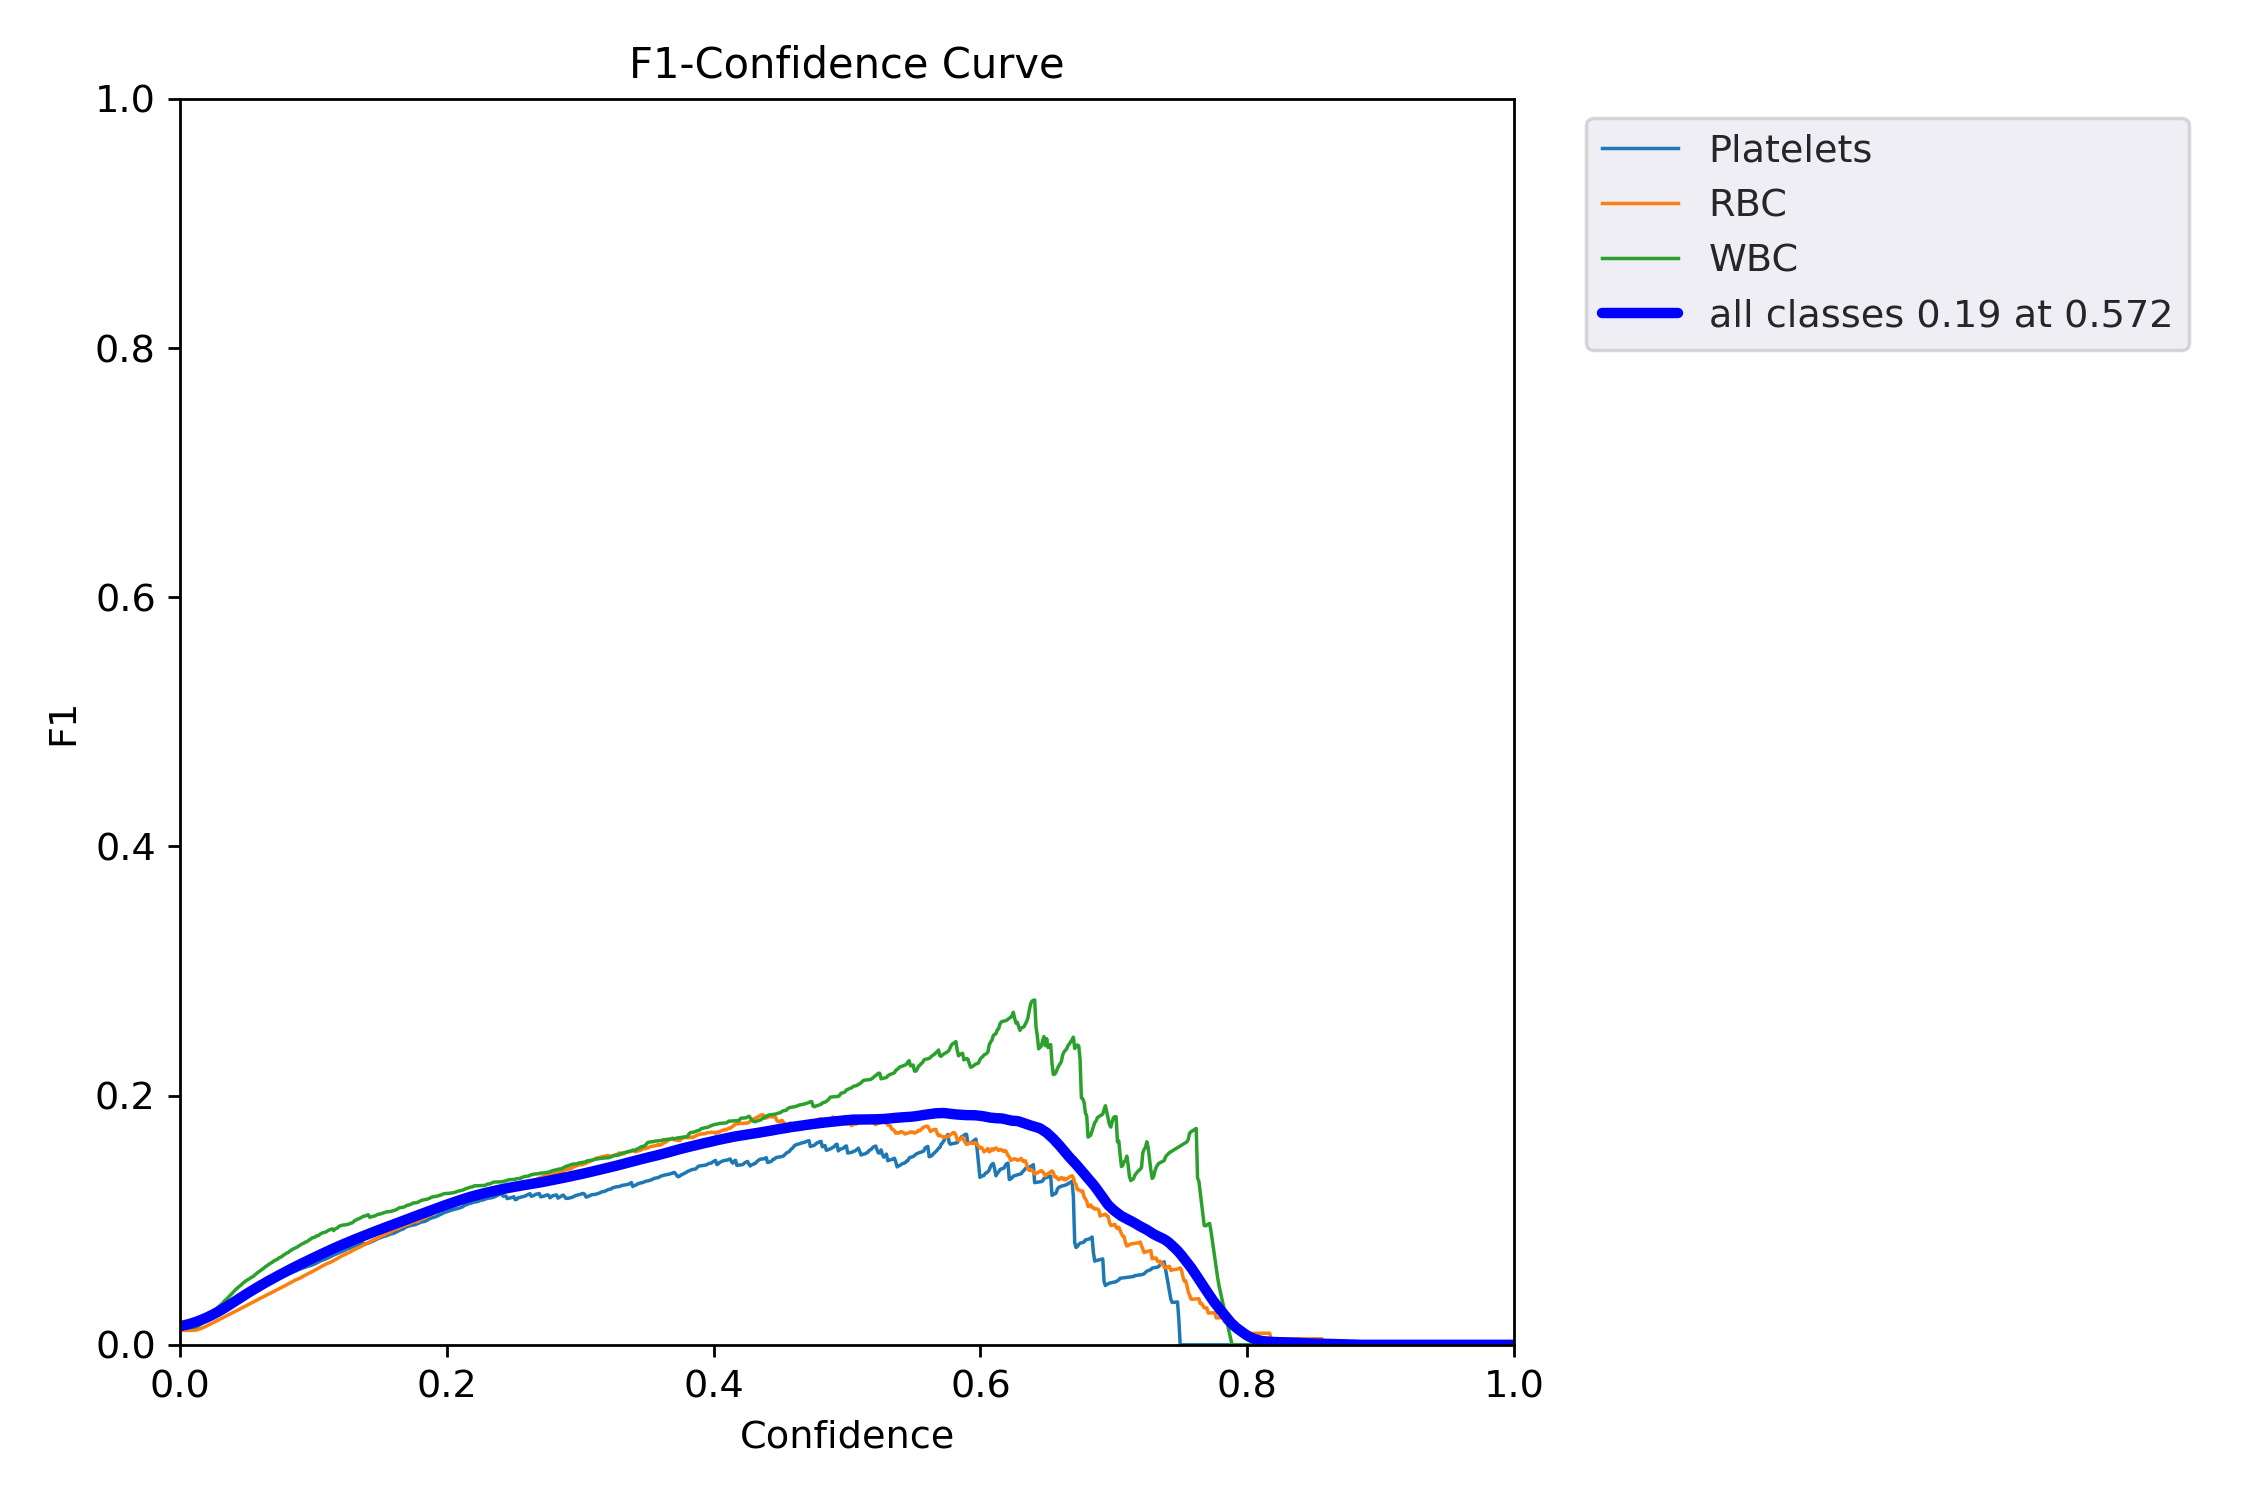

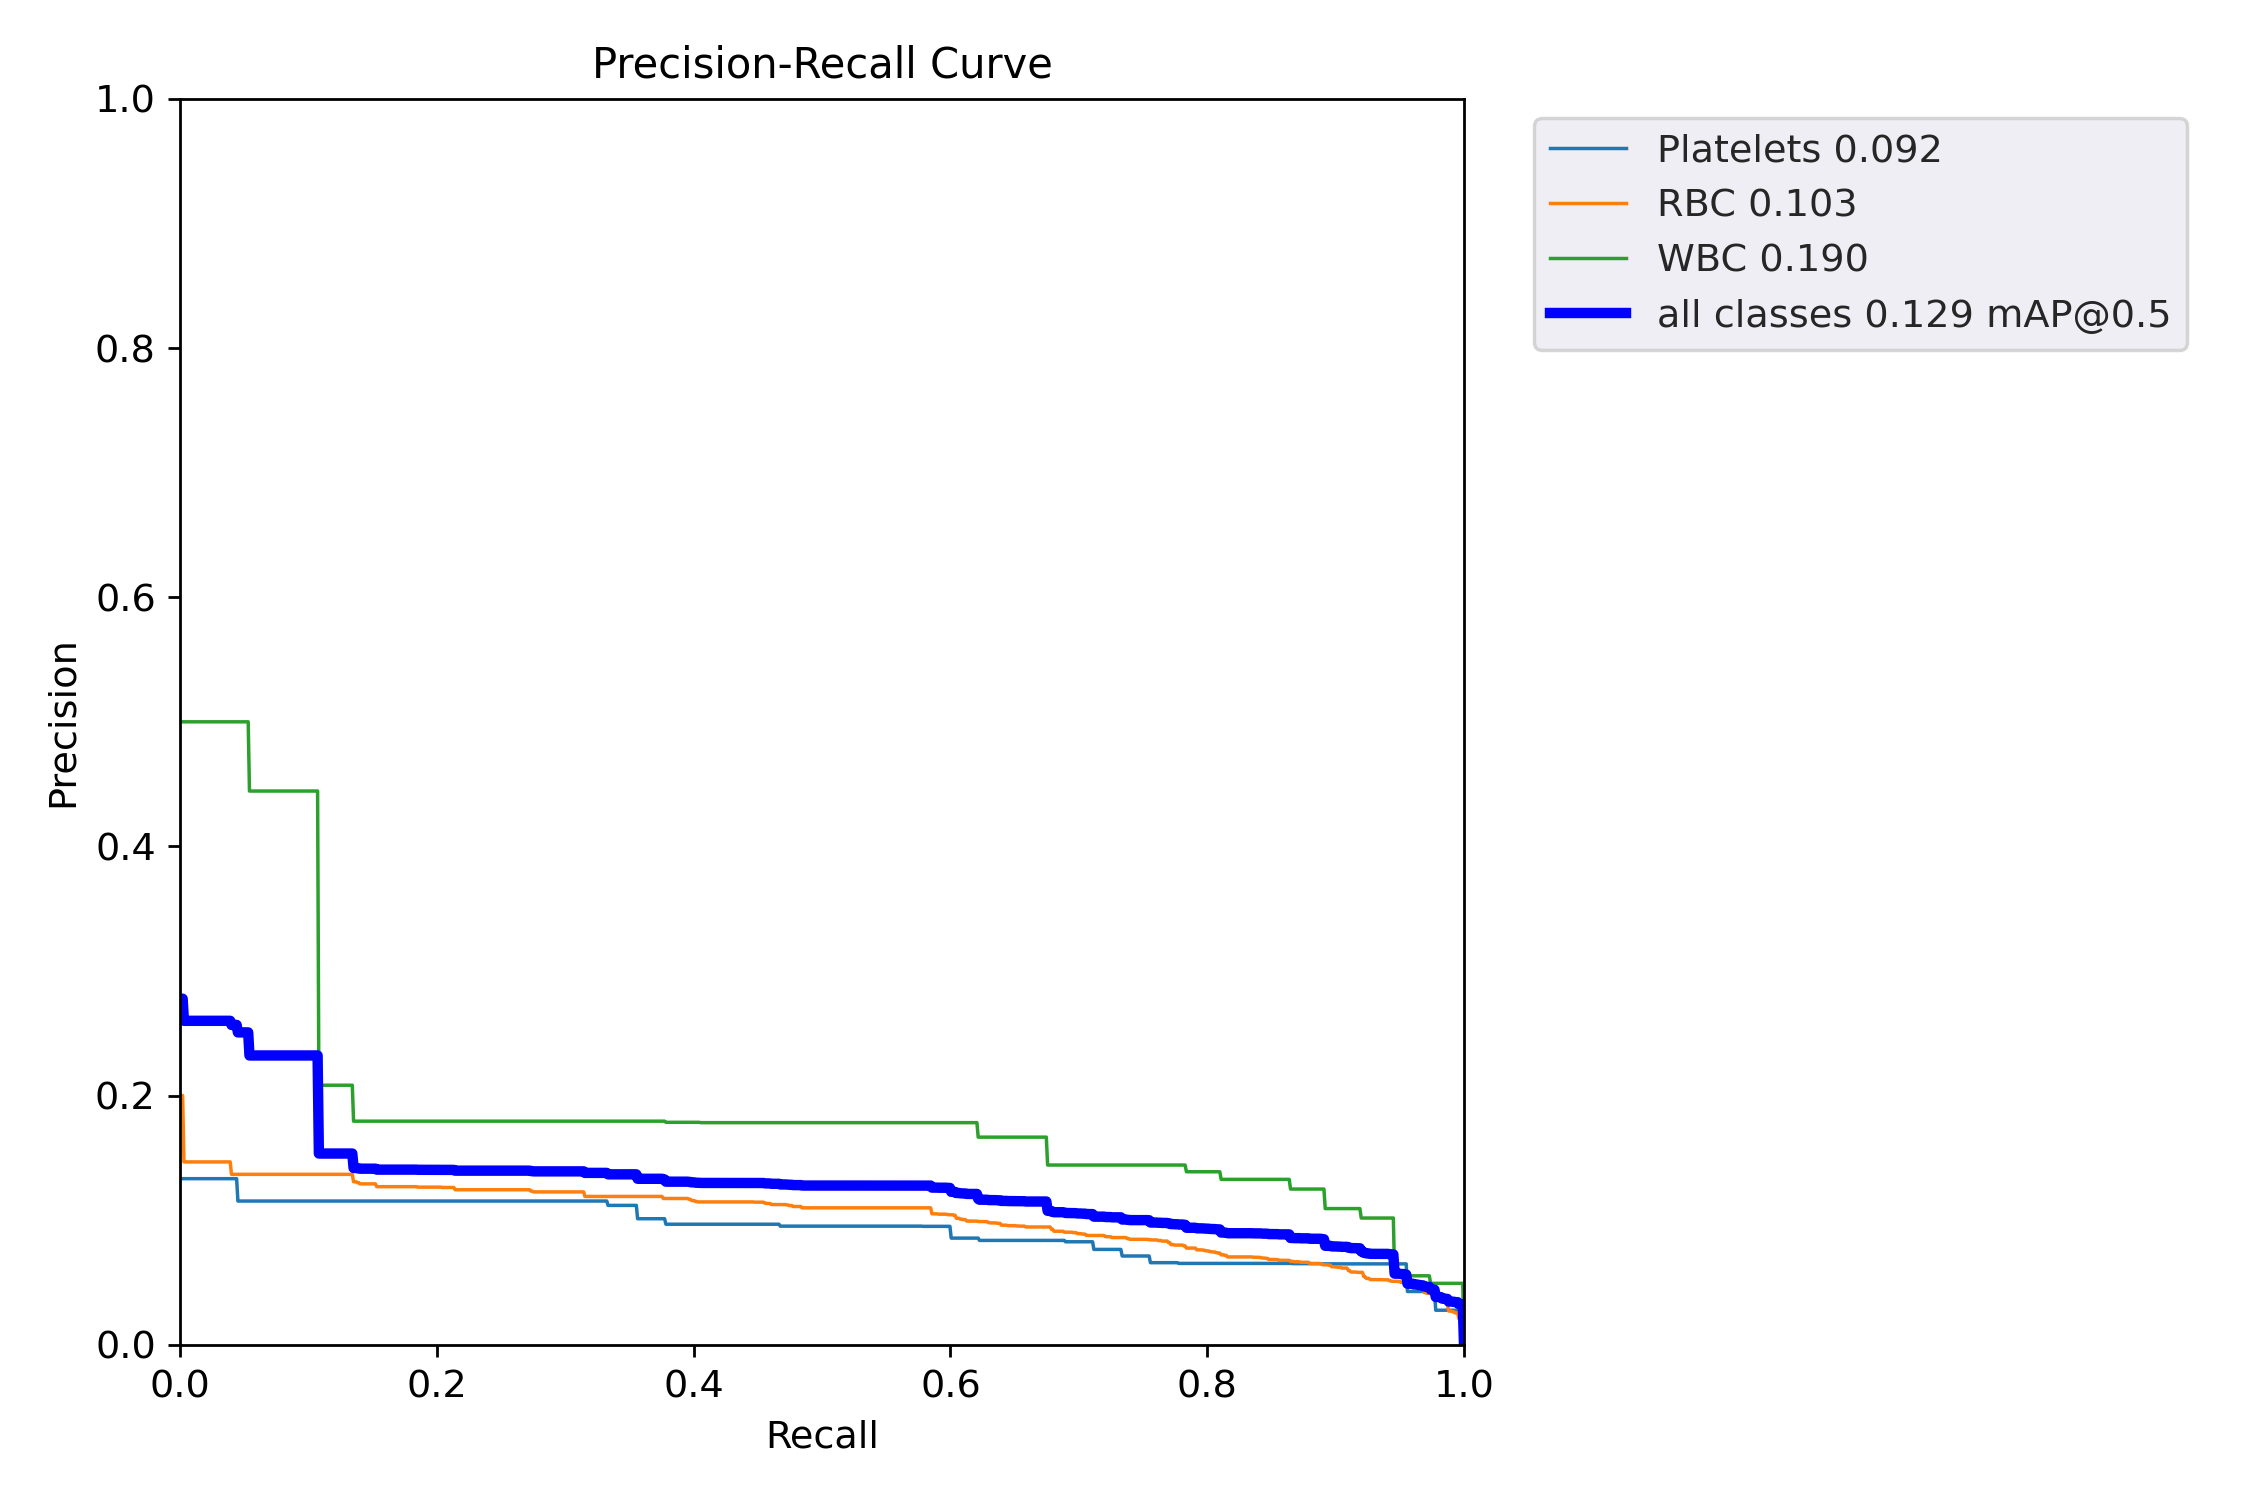

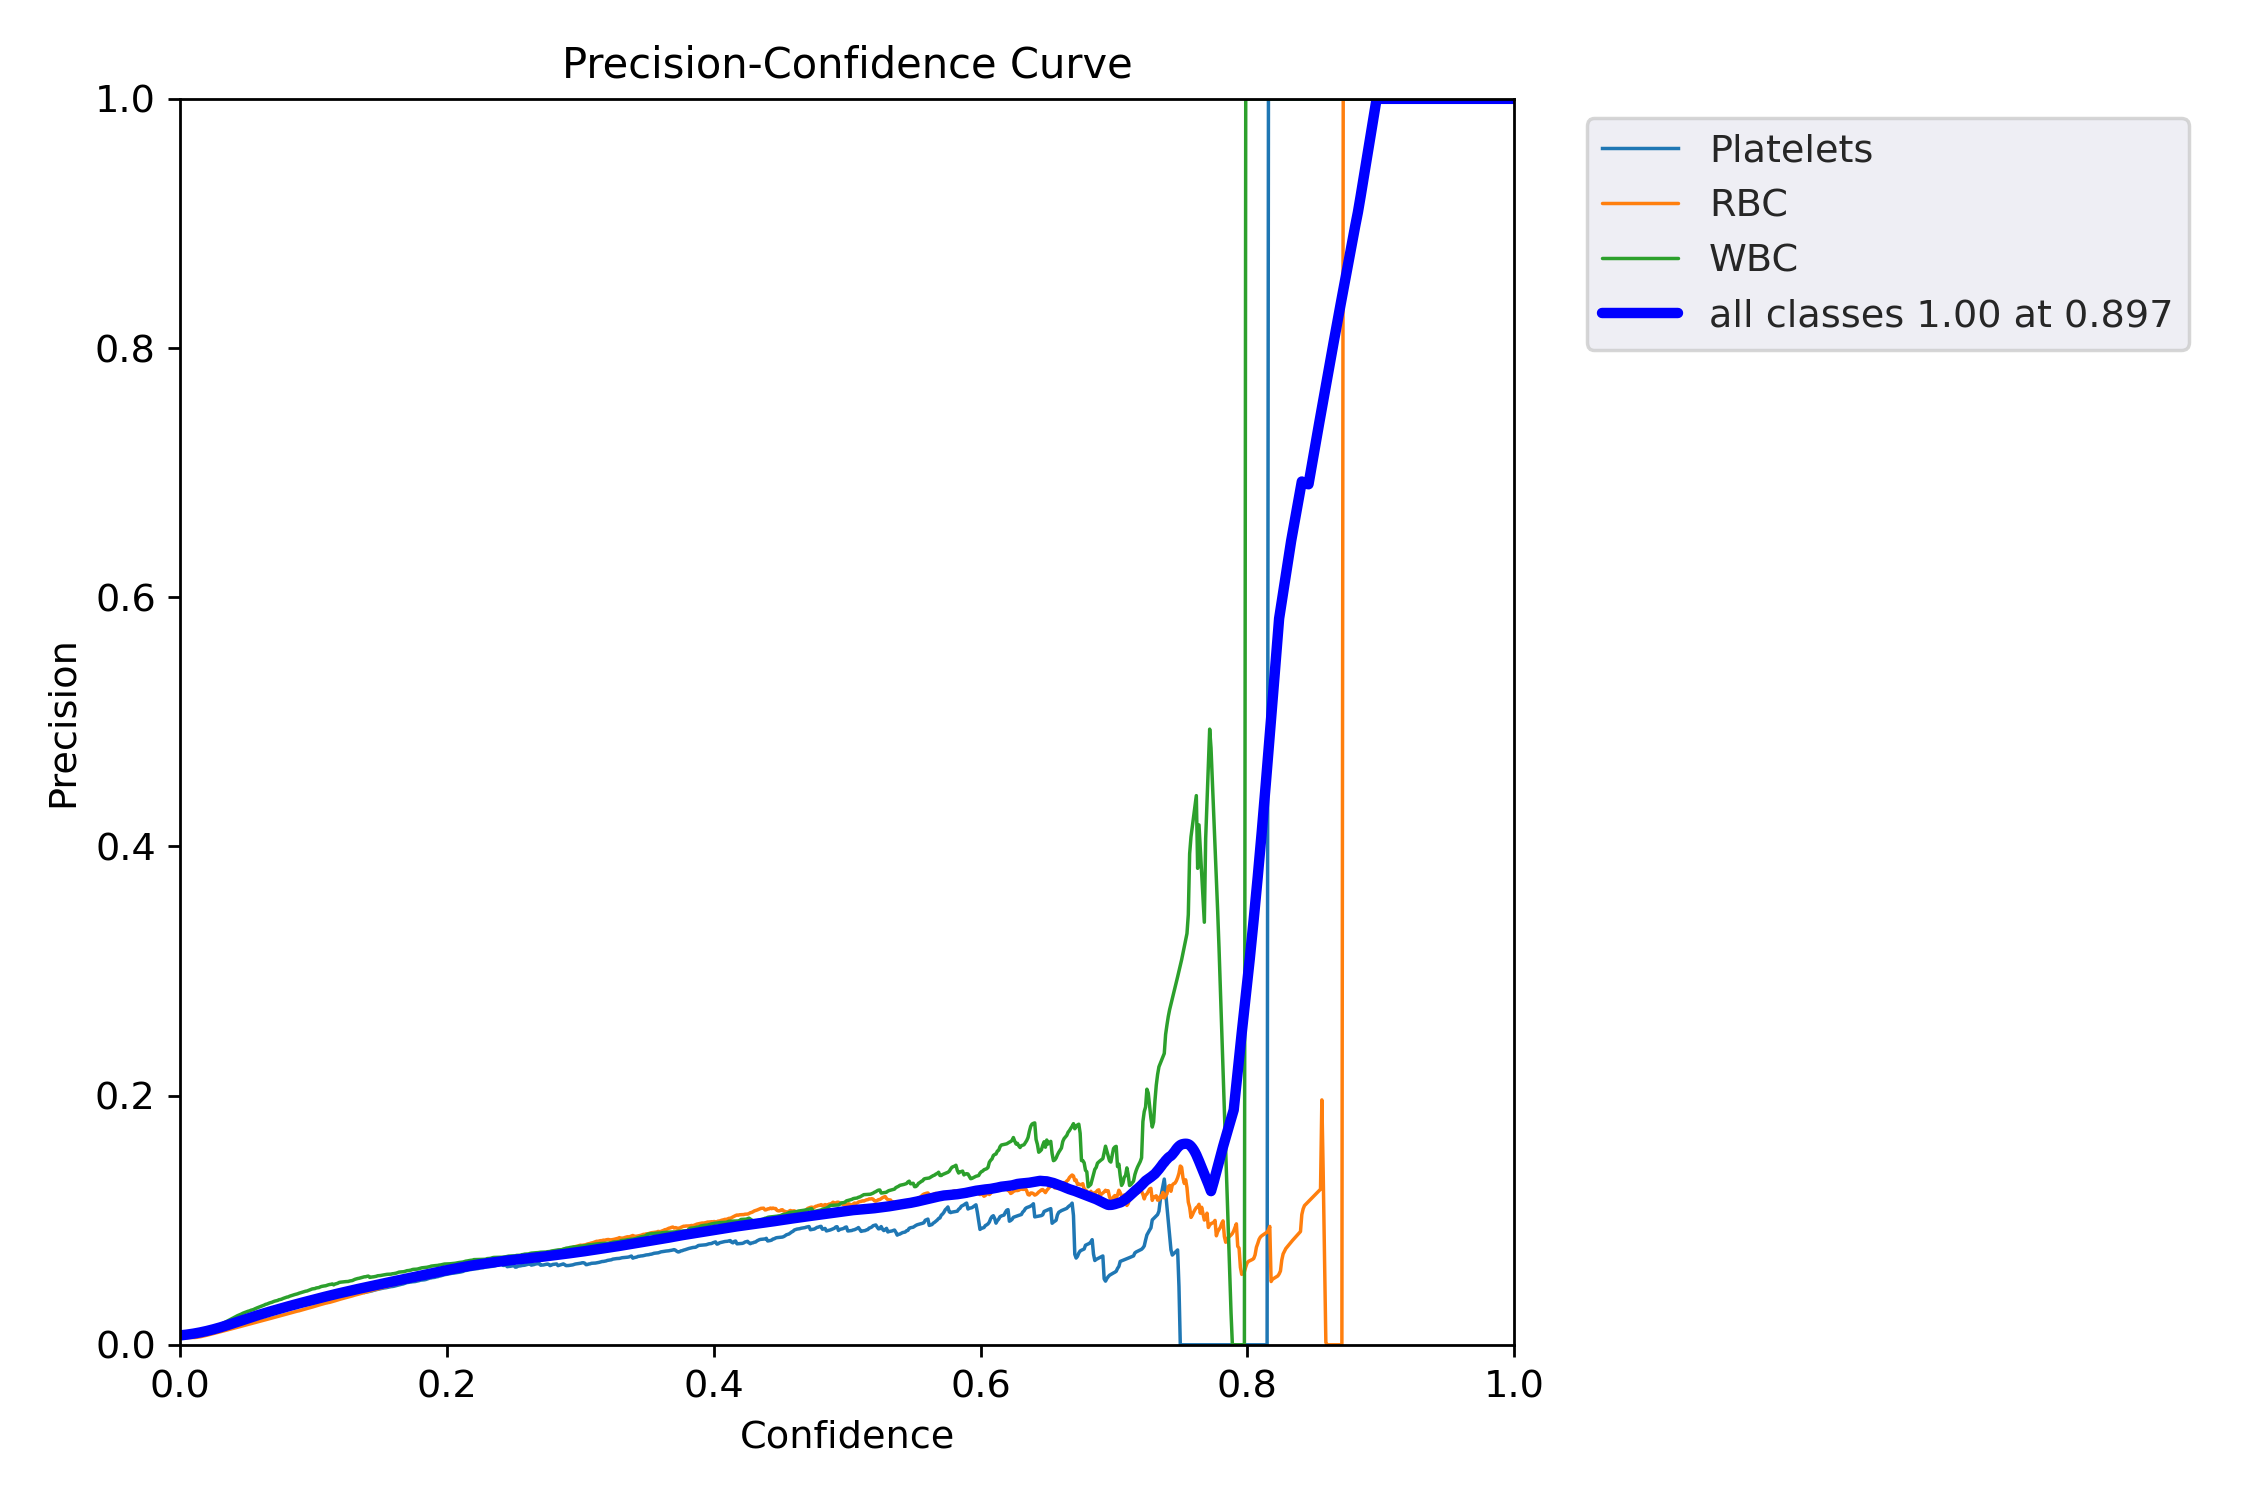

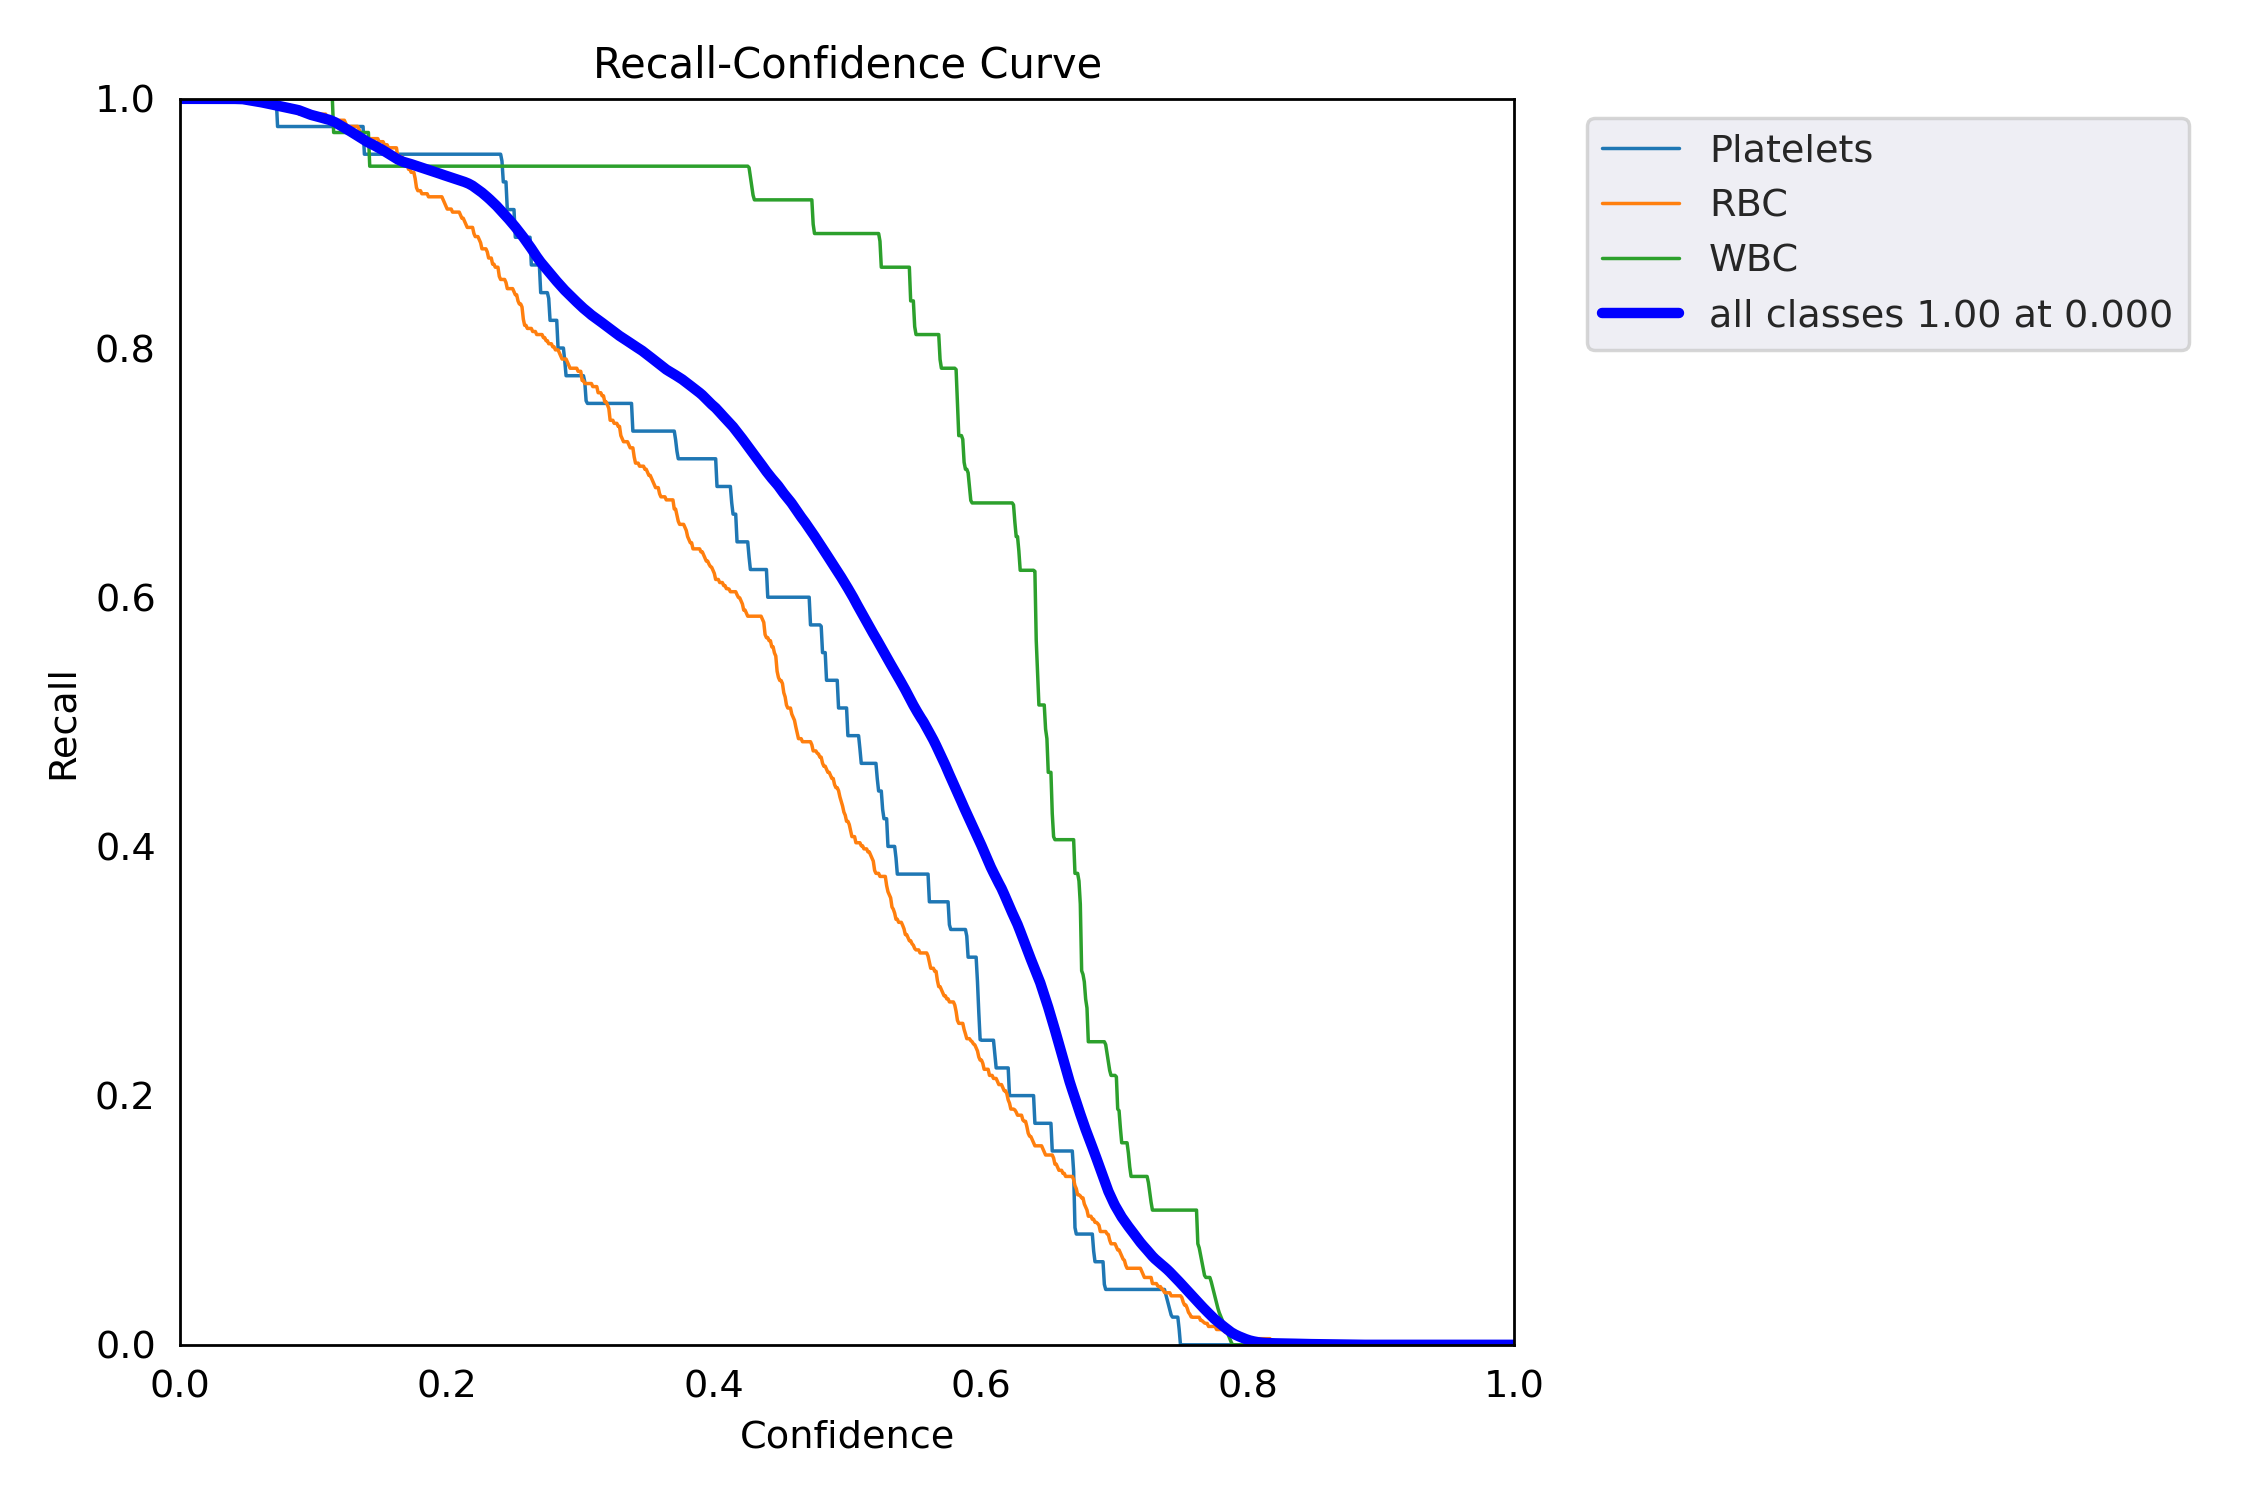

In [ ]:
import cv2
img1=cv2.imread("/content/yolov5/runs/train/BCCM3/F1_curve.png")
img2=cv2.imread("/content/yolov5/runs/train/BCCM3/PR_curve.png")
img3=cv2.imread("/content/yolov5/runs/train/BCCM3/P_curve.png")
img4=cv2.imread("/content/yolov5/runs/train/BCCM3/R_curve.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

#**INFERENCE**

# BATCH PREDICTION
- Results saved to inference/output


**Inference Parameters**

!python 
- <'location of detect.py file'> 
- --source <'location of image/ folder to predict'>
- --weight <'location of the saved best weights'>
- --output <'location of output files after prediction'>

In [ ]:
!python '/content/yolov5/detect.py' --source '/content/bcc/images/valid/' --weights '/content/yolov5/runs/train/BCCM/weights/best.pt' 

detect: weights=['/content/yolov5/runs/train/BCCM/weights/best.pt'], source=/content/bcc/images/valid/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/270 /content/bcc/images/valid/BloodImage_00000.jpg: 480x640 19 RBCs, 1 WBC, 14.9ms
image 2/270 /content/bcc/images/valid/BloodImage_00001.jpg: 480x640 23 RBCs, 1 WBC, 10.2ms
image 3/270 /content/bcc/images/valid/BloodImage_00002.jpg: 480x640 1 Platelets, 18 RBCs, 1 WBC, 10.1ms
image 4/270 /content

## TO STORE PREDICTION ALONG WITH LABELS AND PLOTTED BOUNDING BOXES

TO HIDE LABELS AND ONLY STORE PLOTTED BBOXS

In [ ]:
!python '/content/yolov5/detect.py' --source '/content/bcc/images/valid/' --weights '/content/yolov5/runs/train/BCCM/weights/best.pt' --conf 0.4 --save-txt --save-conf --hide-labels

NOT TO HIDE LABELS

In [ ]:
!python '/content/yolov5/detect.py' --source '/content/bcc/images/valid/' --weights '/content/yolov5/runs/train/BCCM/weights/best.pt' --conf 0.4 --save-txt --save-conf 

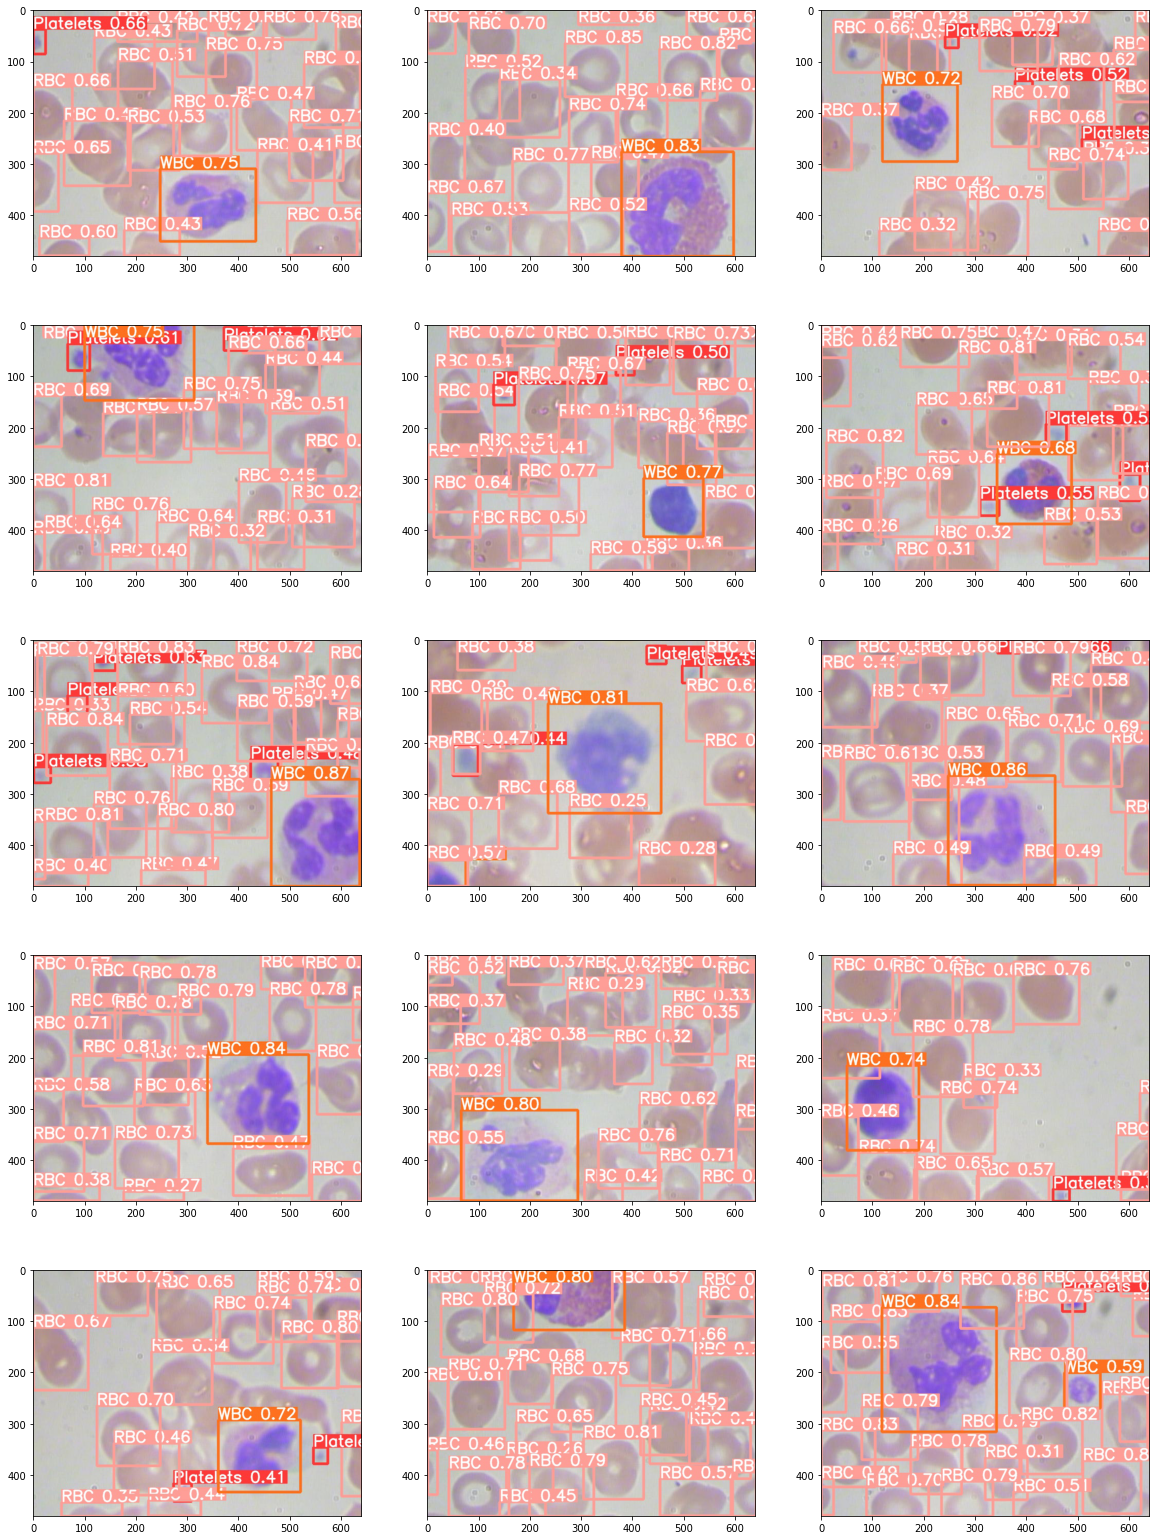

In [ ]:
disp_images = glob('/content/yolov5/runs/detect/exp2/*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# SINGLE IMAGE PREDICTIONS


In [ ]:
output = !python yolov5/detect.py --source /content/bcc/images/valid/BloodImage_00000.jpg --weights '/content/runs/exp0_BCCM/weights/best_BCCM.pt'
print(output)